In [ ]:
# Conectar con drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import shutil
from pathlib import Path

base_dir = '/content/drive/MyDrive/IA2/Proyecto/Dataset'
train_dir = os.path.join(base_dir, 'Training')
val_dir = os.path.join(base_dir, 'Val')


In [ ]:

train_dir = '/content/drive/MyDrive/IA2/Proyecto/Dataset/Balanced_Training'
val_dir = '/content/drive/MyDrive/IA2/Proyecto/Dataset/Val'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

KeyboardInterrupt: 

# CNN

In [ ]:
#CNN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall

# Crear el modelo CNN
model = Sequential()

# Primera capa convolucional y de pooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional y de pooling
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Tercera capa convolucional y de pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Cuarta capa convolucional y de pooling
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Aplanar la salida y agregar las capas densas
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Agregar Dropout para regularización
model.add(Dense(10, activation='softmax'))  # 10 clases de salida

# Compilar el modelo
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
!ls /content/drive/MyDrive

'Copy of Chimera Onboarding FAQ (1).gdoc'  'JulianGaitan - CV.pdf'
'Copy of Chimera Onboarding FAQ.gdoc'	   'Untitled document (1).gdoc'
 Dataset				   'Untitled document (2).gdoc'
 hours.png				   'Untitled document (3).gdoc'
'JulianGaitan - CV (1).pdf'		   'Untitled document.gdoc'


In [ ]:
train_dir = '/content/drive/MyDrive/Dataset/Balanced_Training'
val_dir = '/content/drive/MyDrive/Dataset/Val'


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical'
)

Found 2990 images belonging to 10 classes.
Found 3631 images belonging to 10 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=30  # Puedes ajustar el número de épocas
)

Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 31s 324ms/step - accuracy: 0.7058 - auc: 0.9622 - loss: 0.8159 - precision: 0.7962 - recall: 0.6046 - val_accuracy: 0.7840 - val_auc: 0.9789 - val_loss: 0.6042 - val_precision: 0.8573 - val_recall: 0.7110
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.7188 - auc: 0.9745 - loss: 0.7209 - precision: 0.7917 - recall: 0.5938 - val_accuracy: 0.8000 - val_auc: 0.9733 - val_loss: 0.6939 - val_precision: 0.8571 - val_recall: 0.8000
Epoch 3/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


93/93 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.7481 - auc: 0.9691 - loss: 0.7269 - precision: 0.8144 - recall: 0.6544 - val_accuracy: 0.8213 - val_auc: 0.9846 - val_loss: 0.5056 - val_precision: 0.8835 - val_recall: 0.7652
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.7188 - auc: 0.9732 - loss: 0.7070 - precision: 0.8462 - recall: 0.6875 - val_accuracy: 0.7333 - val_auc: 0.9881 - val_loss: 0.4838 - val_precision: 0.8333 - val_recall: 0.6667
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 36s 323ms/step - accuracy: 0.7834 - auc: 0.9750 - loss: 0.6360 - precision: 0.8502 - recall: 0.7103 - val_accuracy: 0.8169 - val_auc: 0.9817 - val_loss: 0.5342 - val_precision: 0.8596 - val_recall: 0.7669
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.7812 - auc: 0.9792 - loss: 0.5990 - precision: 0.8276 - recall: 0.7500 - val_accuracy: 1.0000 - val_auc: 1.0000 - val_loss: 0.1720 - val_precision: 1.0000 - val_recall: 0.9333
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 30s 

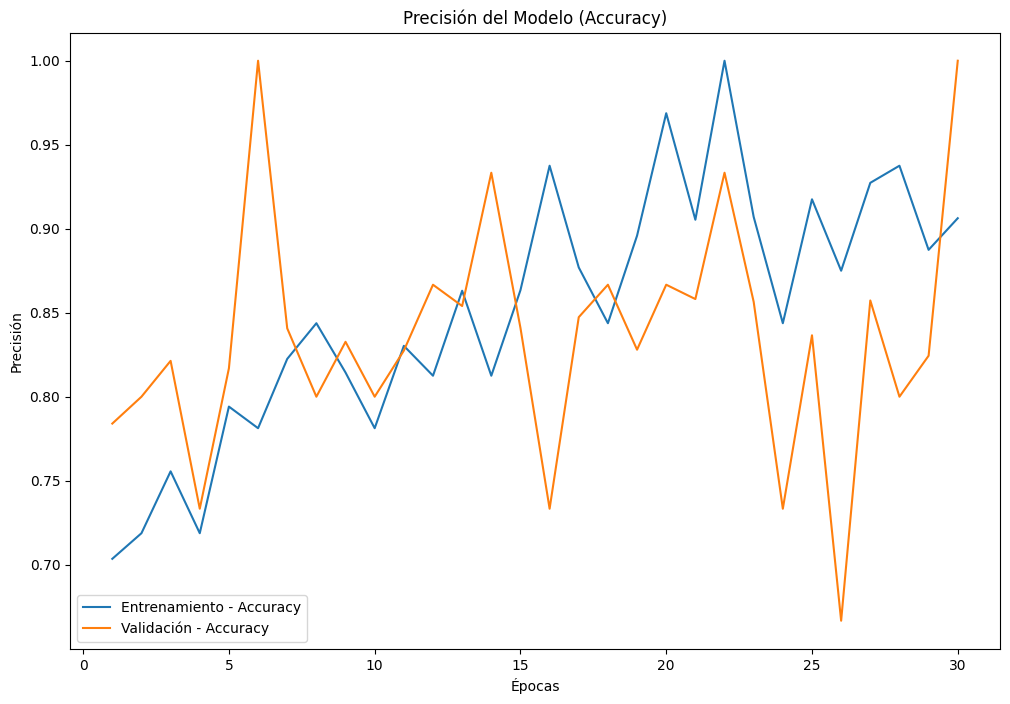

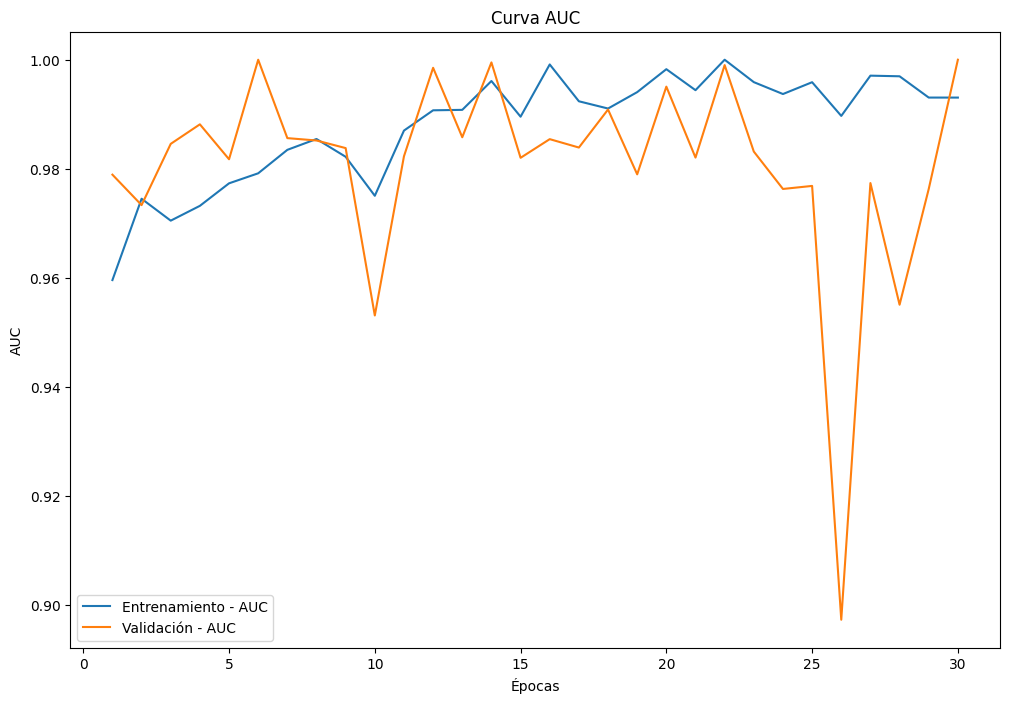

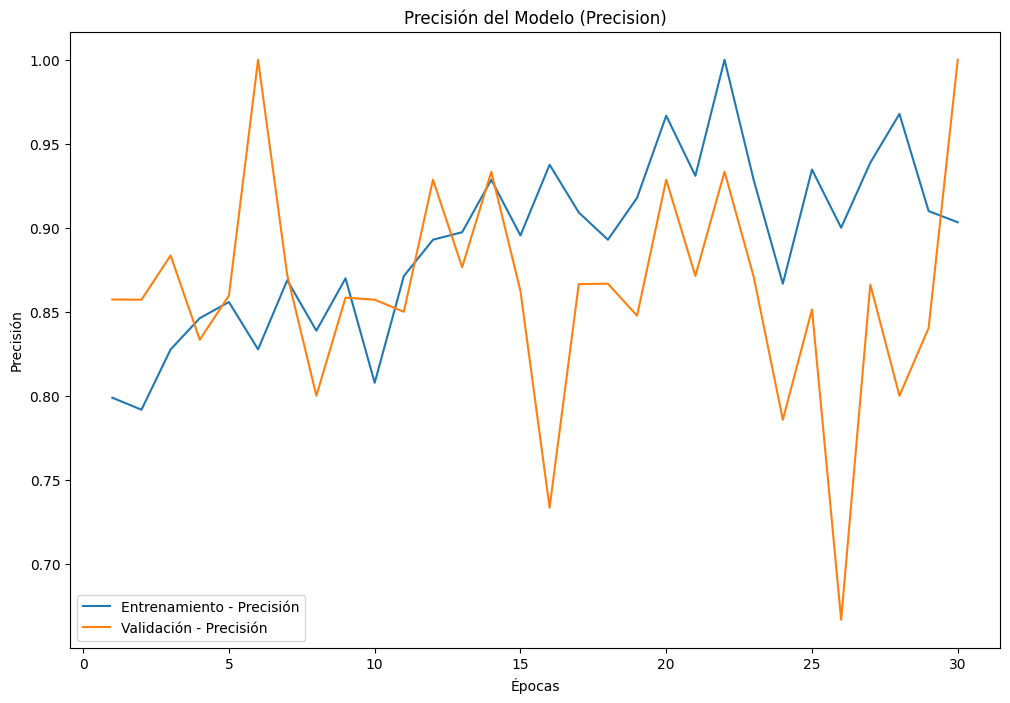

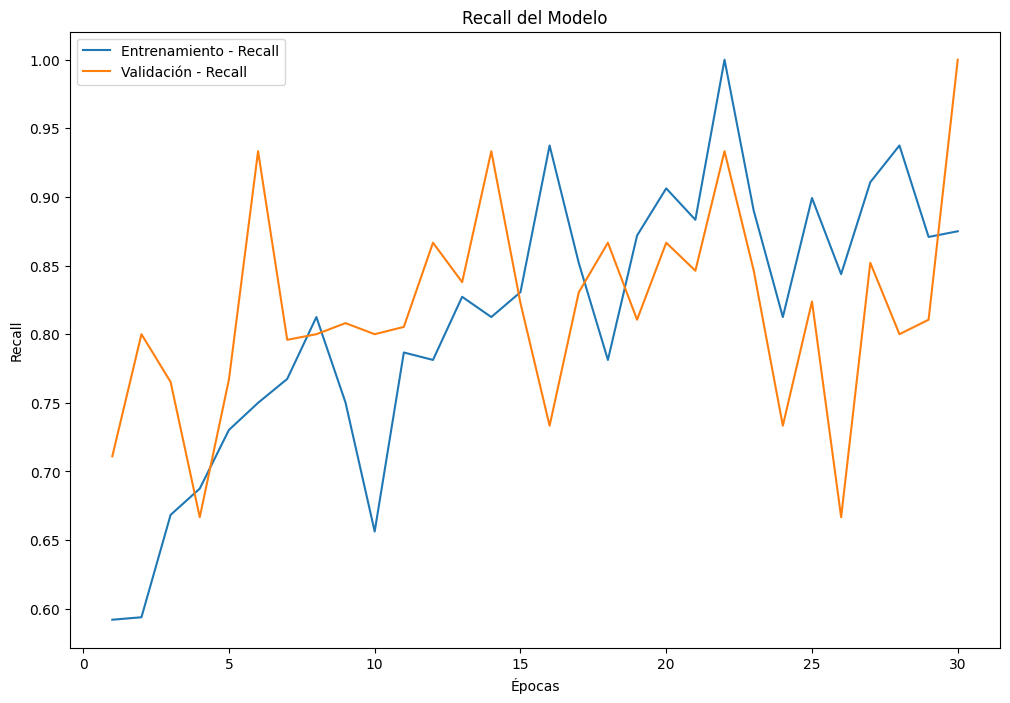

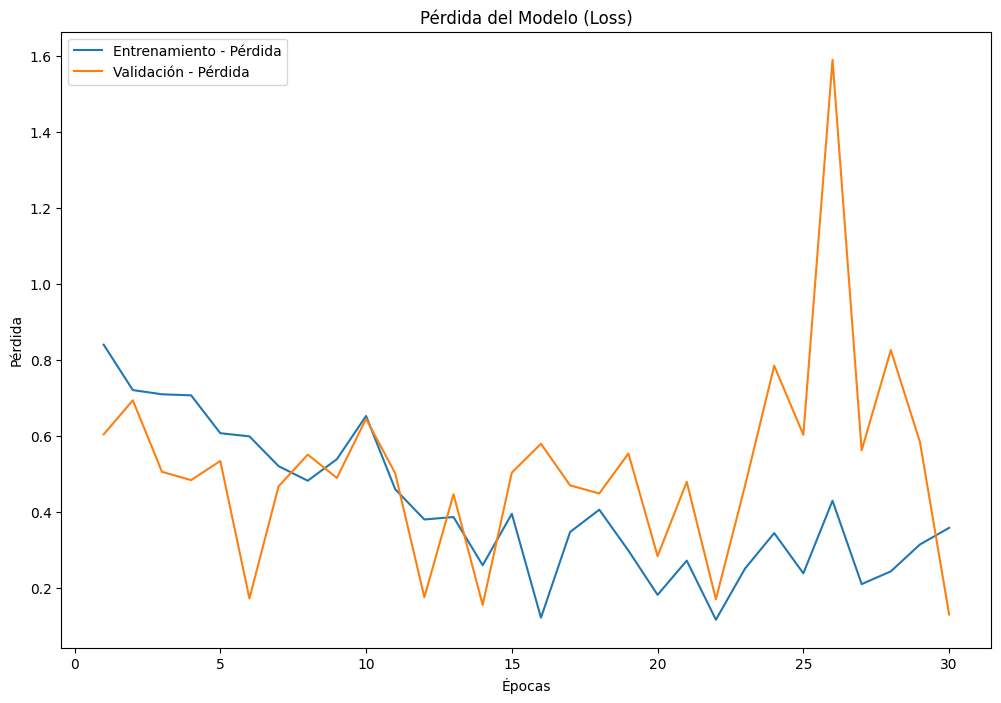

In [ ]:
import matplotlib.pyplot as plt

# Extraer datos del historial de entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
auc = history.history['auc']
val_auc = history.history['val_auc']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Número de épocas
epochs = range(1, len(acc) + 1)

# Gráfica de Precisión (Accuracy)
plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, label='Entrenamiento - Accuracy')
plt.plot(epochs, val_acc, label='Validación - Accuracy')
plt.title('Precisión del Modelo (Accuracy)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfica de AUC
plt.figure(figsize=(12, 8))
plt.plot(epochs, auc, label='Entrenamiento - AUC')
plt.plot(epochs, val_auc, label='Validación - AUC')
plt.title('Curva AUC')
plt.xlabel('Épocas')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Gráfica de Precisión (Precision)
plt.figure(figsize=(12, 8))
plt.plot(epochs, precision, label='Entrenamiento - Precisión')
plt.plot(epochs, val_precision, label='Validación - Precisión')
plt.title('Precisión del Modelo (Precision)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfica de Recall
plt.figure(figsize=(12, 8))
plt.plot(epochs, recall, label='Entrenamiento - Recall')
plt.plot(epochs, val_recall, label='Validación - Recall')
plt.title('Recall del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Gráfica de Pérdida (Loss)
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, label='Entrenamiento - Pérdida')
plt.plot(epochs, val_loss, label='Validación - Pérdida')
plt.title('Pérdida del Modelo (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC, Precision, Recall
from tensorflow.keras.initializers import HeNormal
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Crear el modelo CNN mejorado
model = Sequential()

# Primera capa convolucional y de pooling
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeNormal(), input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Segunda capa convolucional y de pooling
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Tercera capa convolucional y de pooling
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Cuarta capa convolucional y de pooling
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

# Aplanar la salida y agregar las capas densas
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer=HeNormal()))
model.add(Dropout(0.6))  # Aumentar Dropout para mayor regularización
model.add(Dense(10, activation='softmax'))  # 10 clases de salida

# Inicializar el optimizador con una tasa de aprendizaje baja
optimizer = Adam(learning_rate=0.0001)

# Compilar el modelo con las métricas especificadas
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])

# Entrenamiento del modelo con el callback de reducción de tasa de aprendizaje
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=30,
)


Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 328s 3s/step - accuracy: 0.3009 - auc: 0.7031 - loss: 2.6024 - precision: 0.4249 - recall: 0.1559 - val_accuracy: 0.4353 - val_auc: 0.7718 - val_loss: 1.9707 - val_precision: 0.7634 - val_recall: 0.2713
Epoch 2/30
 1/93 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - accuracy: 0.4688 - auc: 0.8670 - loss: 1.5195 - precision: 0.6842 - recall: 0.4062

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


93/93 ━━━━━━━━━━━━━━━━━━━━ 13s 140ms/step - accuracy: 0.4688 - auc: 0.8670 - loss: 1.5195 - precision: 0.6842 - recall: 0.4062 - val_accuracy: 0.5333 - val_auc: 0.7652 - val_loss: 1.9774 - val_precision: 0.6667 - val_recall: 0.2667
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 31s 325ms/step - accuracy: 0.5736 - auc: 0.9116 - loss: 1.2440 - precision: 0.7531 - recall: 0.4123 - val_accuracy: 0.4610 - val_auc: 0.8050 - val_loss: 2.1937 - val_precision: 0.5987 - val_recall: 0.4220
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.5000 - auc: 0.9167 - loss: 1.2375 - precision: 0.5238 - recall: 0.3438 - val_accuracy: 0.4667 - val_auc: 0.7877 - val_loss: 2.3585 - val_precision: 0.5000 - val_recall: 0.2000
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 40s 317ms/step - accuracy: 0.6822 - auc: 0.9459 - loss: 0.9695 - precision: 0.8118 - recall: 0.5458 - val_accuracy: 0.4978 - val_auc: 0.8503 - val_loss: 1.7708 - val_precision: 0.6546 - val_recall: 0.4450
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s

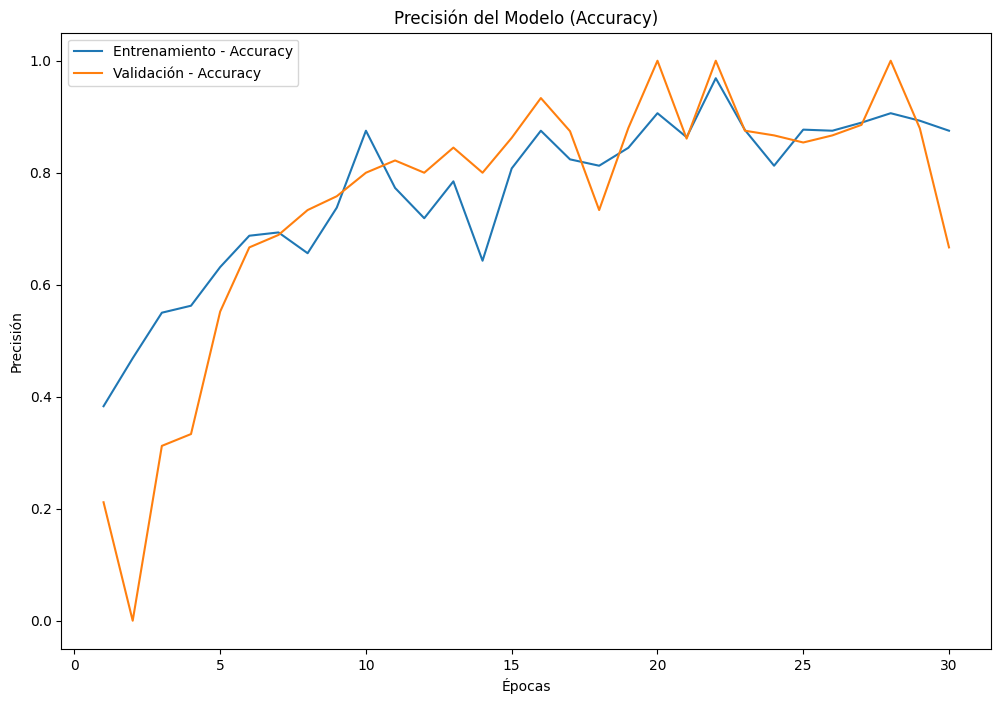

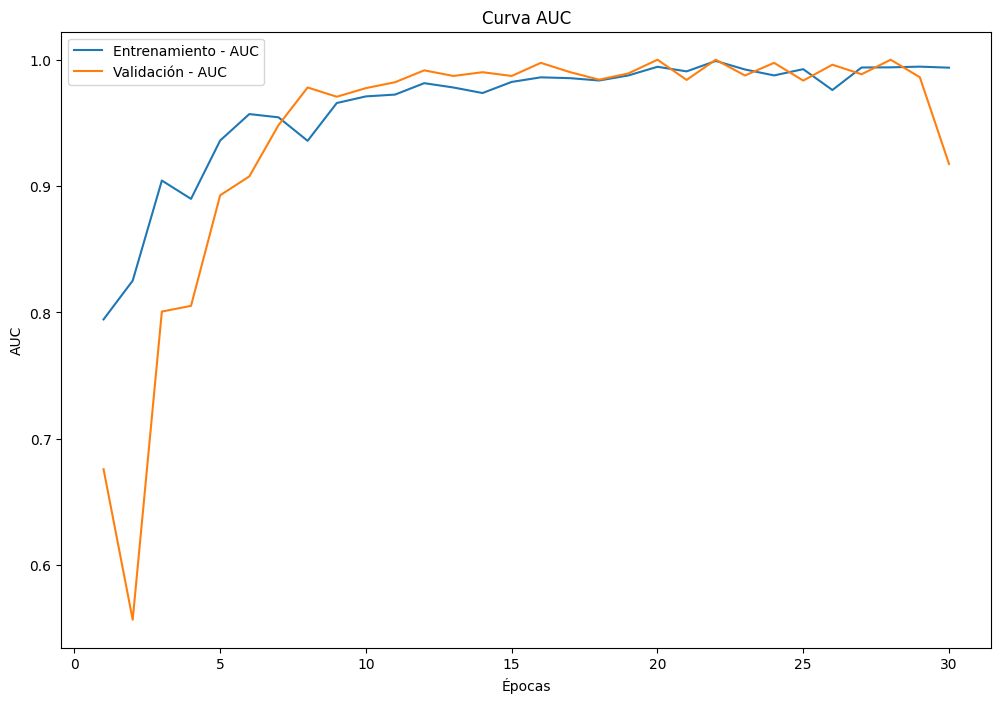

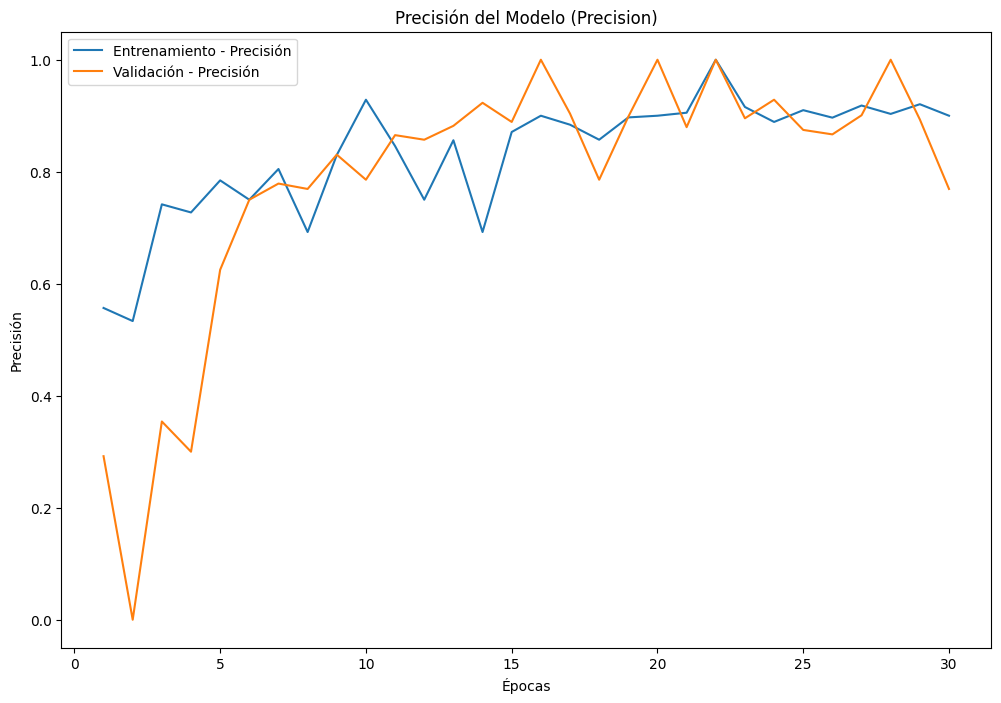

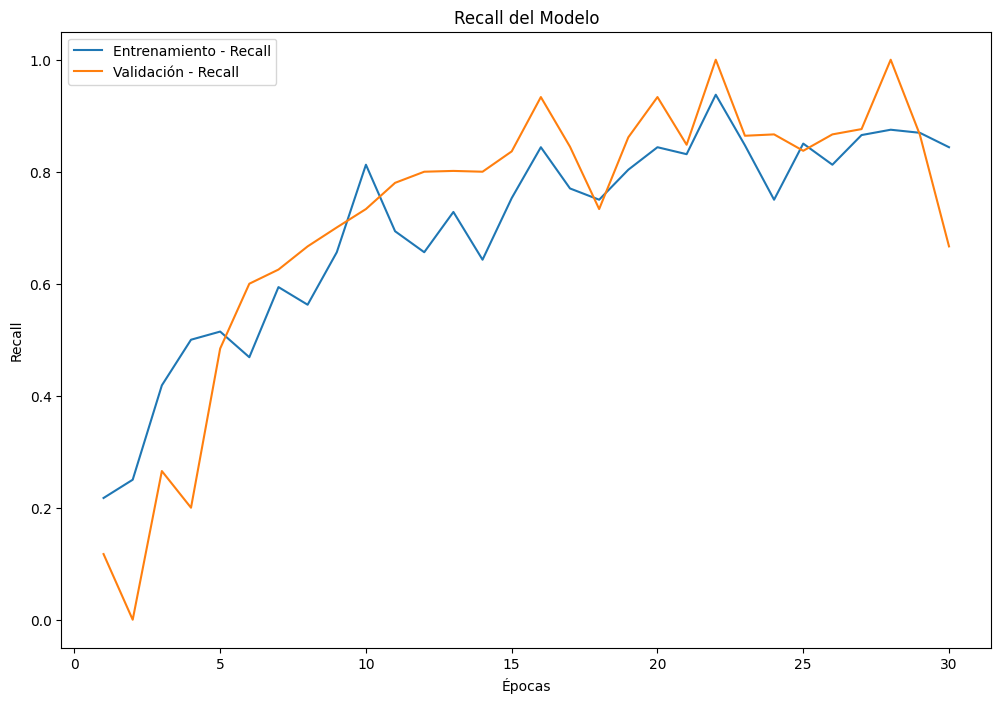

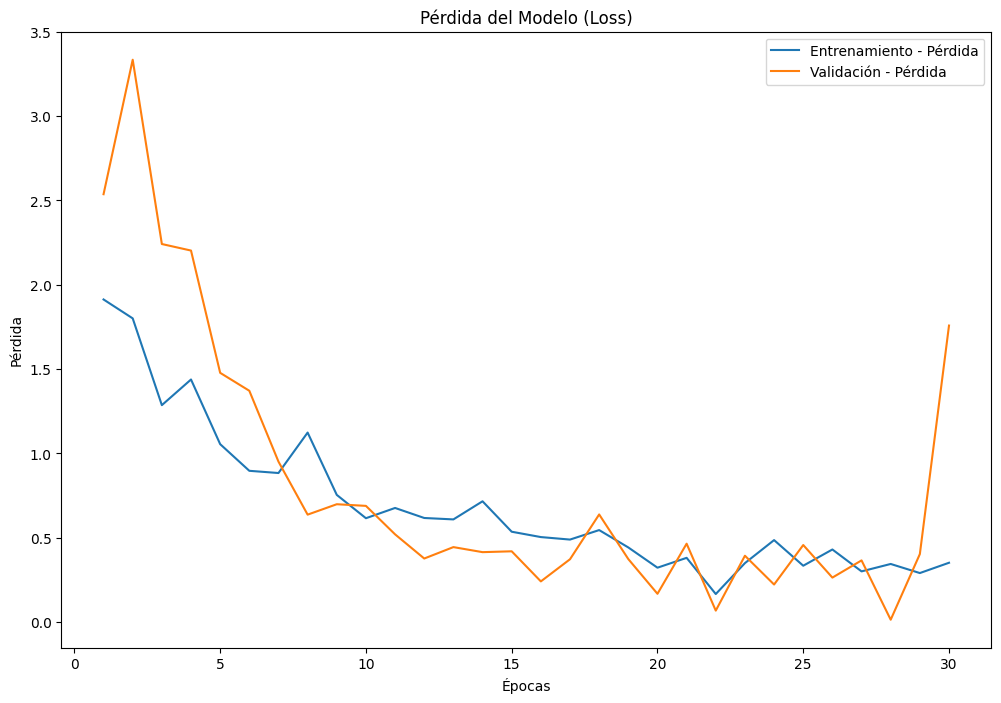

In [ ]:
import matplotlib.pyplot as plt

# Extraer datos del historial de entrenamiento
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
auc = history.history['auc']
val_auc = history.history['val_auc']
precision = history.history['precision']
val_precision = history.history['val_precision']
recall = history.history['recall']
val_recall = history.history['val_recall']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Número de épocas
epochs = range(1, len(acc) + 1)

# Gráfica de Precisión (Accuracy)
plt.figure(figsize=(12, 8))
plt.plot(epochs, acc, label='Entrenamiento - Accuracy')
plt.plot(epochs, val_acc, label='Validación - Accuracy')
plt.title('Precisión del Modelo (Accuracy)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfica de AUC
plt.figure(figsize=(12, 8))
plt.plot(epochs, auc, label='Entrenamiento - AUC')
plt.plot(epochs, val_auc, label='Validación - AUC')
plt.title('Curva AUC')
plt.xlabel('Épocas')
plt.ylabel('AUC')
plt.legend()
plt.show()

# Gráfica de Precisión (Precision)
plt.figure(figsize=(12, 8))
plt.plot(epochs, precision, label='Entrenamiento - Precisión')
plt.plot(epochs, val_precision, label='Validación - Precisión')
plt.title('Precisión del Modelo (Precision)')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()

# Gráfica de Recall
plt.figure(figsize=(12, 8))
plt.plot(epochs, recall, label='Entrenamiento - Recall')
plt.plot(epochs, val_recall, label='Validación - Recall')
plt.title('Recall del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Recall')
plt.legend()
plt.show()

# Gráfica de Pérdida (Loss)
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss, label='Entrenamiento - Pérdida')
plt.plot(epochs, val_loss, label='Validación - Pérdida')
plt.title('Pérdida del Modelo (Loss)')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

114/114 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step - accuracy: 0.8762 - auc: 0.9851 - loss: 0.4066 - precision: 0.8876 - recall: 0.8628
Pérdida en el conjunto de testeo: 0.40183356404304504
Precisión en el conjunto de testeo: 0.8801982998847961
AUC en el conjunto de testeo: 0.9860286116600037
Precisión (Precision) en el conjunto de testeo: 0.89406418800354
Recall en el conjunto de testeo: 0.8669787645339966
114/114 ━━━━━━━━━━━━━━━━━━━━ 17s 147ms/step


<Figure size 1000x800 with 0 Axes>

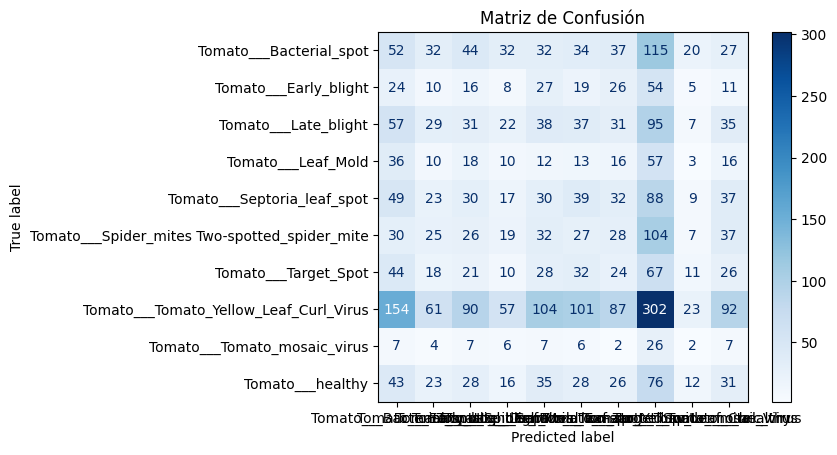

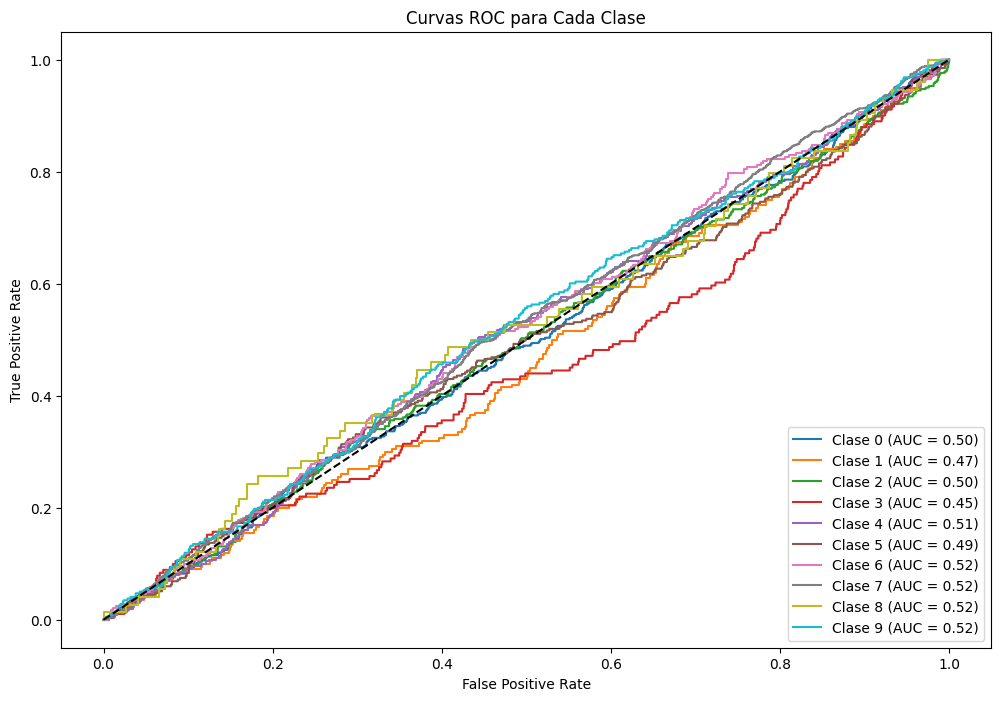

Reporte de Clasificación:
                                                precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.10      0.12      0.11       425
                        Tomato___Early_blight       0.04      0.05      0.05       200
                         Tomato___Late_blight       0.10      0.08      0.09       382
                           Tomato___Leaf_Mold       0.05      0.05      0.05       191
                  Tomato___Septoria_leaf_spot       0.09      0.08      0.09       354
Tomato___Spider_mites Two-spotted_spider_mite       0.08      0.08      0.08       335
                         Tomato___Target_Spot       0.08      0.09      0.08       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.31      0.28      0.29      1071
                 Tomato___Tomato_mosaic_virus       0.02      0.03      0.02        74
                             Tomato___healthy       0.10      0.10      0.10       318

              

In [ ]:
# Evaluar el modelo en el conjunto de validación/testeo
test_loss, test_accuracy, test_auc, test_precision, test_recall = model.evaluate(val_generator)

# Imprimir los resultados
print(f'Pérdida en el conjunto de testeo: {test_loss}')
print(f'Precisión en el conjunto de testeo: {test_accuracy}')
print(f'AUC en el conjunto de testeo: {test_auc}')
print(f'Precisión (Precision) en el conjunto de testeo: {test_precision}')
print(f'Recall en el conjunto de testeo: {test_recall}')

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Obtener predicciones del modelo
test_predictions = model.predict(val_generator)
test_pred_classes = np.argmax(test_predictions, axis=1)
true_classes = val_generator.classes

# Generar matriz de confusión
cm = confusion_matrix(true_classes, test_pred_classes)
cmd = ConfusionMatrixDisplay(cm, display_labels=val_generator.class_indices.keys())

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
cmd.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión')
plt.show()

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convertir etiquetas verdaderas y predicciones a formato binarizado
true_labels_bin = label_binarize(true_classes, classes=list(range(len(val_generator.class_indices))))
pred_probabilities = test_predictions  # Probabilidades predichas

# Graficar curvas ROC para cada clase
plt.figure(figsize=(12, 8))
for i in range(len(val_generator.class_indices)):
    fpr, tpr, _ = roc_curve(true_labels_bin[:, i], pred_probabilities[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Clase {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea de referencia
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC para Cada Clase')
plt.legend(loc='lower right')
plt.show()

from sklearn.metrics import classification_report

# Generar reporte de clasificación
report = classification_report(true_classes, test_pred_classes, target_names=val_generator.class_indices.keys())
print("Reporte de Clasificación:\n", report)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.metrics import AUC, Precision, Recall

model = Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3, 3), activation='relu', kernel_regularizer=l2(0.001), input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Segunda capa convolucional
model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

# Tercera capa convolucional
model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Cuarta capa convolucional
model.add(Conv2D(256, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.4))

# Quinta capa convolucional
model.add(Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Sexta capa convolucional
model.add(Conv2D(512, (3, 3), activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

# Aplanar y capas densas
model.add(Flatten())

# Primera capa densa
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Segunda capa densa
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Tercera capa densa
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Capa de salida
model.add(Dense(10, activation='softmax'))  # 10 clases en total

# Compilar el modelo
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall')])

# Callbacks para reducir la tasa de aprendizaje y detener el entrenamiento temprano
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)

# Entrenar el modelo
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=30,
    callbacks=[reduce_lr, early_stopping]
)


Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1267s 13s/step - accuracy: 0.0992 - auc: 0.4952 - loss: 6.1540 - precision: 0.0992 - recall: 0.0448 - val_accuracy: 0.1170 - val_auc: 0.5466 - val_loss: 4.8721 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.0625 - auc: 0.4574 - loss: 6.3742 - precision: 0.0833 - recall: 0.0312 - val_accuracy: 0.1333 - val_auc: 0.5711 - val_loss: 4.8754 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1232s 13s/step - accuracy: 0.1244 - auc: 0.5603 - loss: 5.7595 - precision: 0.1409 - recall: 0.0601 - val_accuracy: 0.1167 - val_auc: 0.4872 - val_loss: 5.8353 - val_precision: 0.1167 - val_recall: 0.1167 - learning_rate: 1.0000e-04
Epoch 4/30
 1/93 ━━━━━━━━━━━━━━━━━━━━ 7:21 5s/step - accuracy: 0.2857 - auc: 0.7032 - loss: 5.1291 - precision: 0.6000 - recall: 0.2143
Epoch 4: ReduceLROnPlateau reducing 

#TRAINING DE DATASET CON TODAS LAS IMAGENES
Aqui "cambiaré el dataset" ya que antes trabaje con un dataset reducido, ahora tomare todo el **dataset**

In [1]:
# Conectar con drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os
import shutil
from pathlib import Path

base_dir = '/content/drive/MyDrive/IA2/Proyecto/Dataset'
train_dir = os.path.join(base_dir, 'Training')
val_dir = os.path.join(base_dir, 'Val')

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet50 import preprocess_input

# Load the training dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    shuffle=True
)

# Load the validation dataset
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(224, 224),  # Resize images to 224x224
    batch_size=32,
    shuffle=False
)

# Get the class names before mapping transformations
class_names = train_dataset.class_names
print("Classes:", class_names)

# Normalize the pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))
val_dataset = val_dataset.map(lambda x, y: (normalization_layer(x), y))

# Check the first batch of images and labels
for images, labels in train_dataset.take(1):
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels: {labels}")


Found 14539 files belonging to 10 classes.
Found 3631 files belonging to 10 classes.
Classes: ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']
Batch of images shape: (32, 224, 224, 3)
Batch of labels: [4 5 7 3 7 6 0 3 7 2 4 7 7 3 2 7 4 9 4 6 9 7 5 9 6 7 3 4 6 7 3 4]


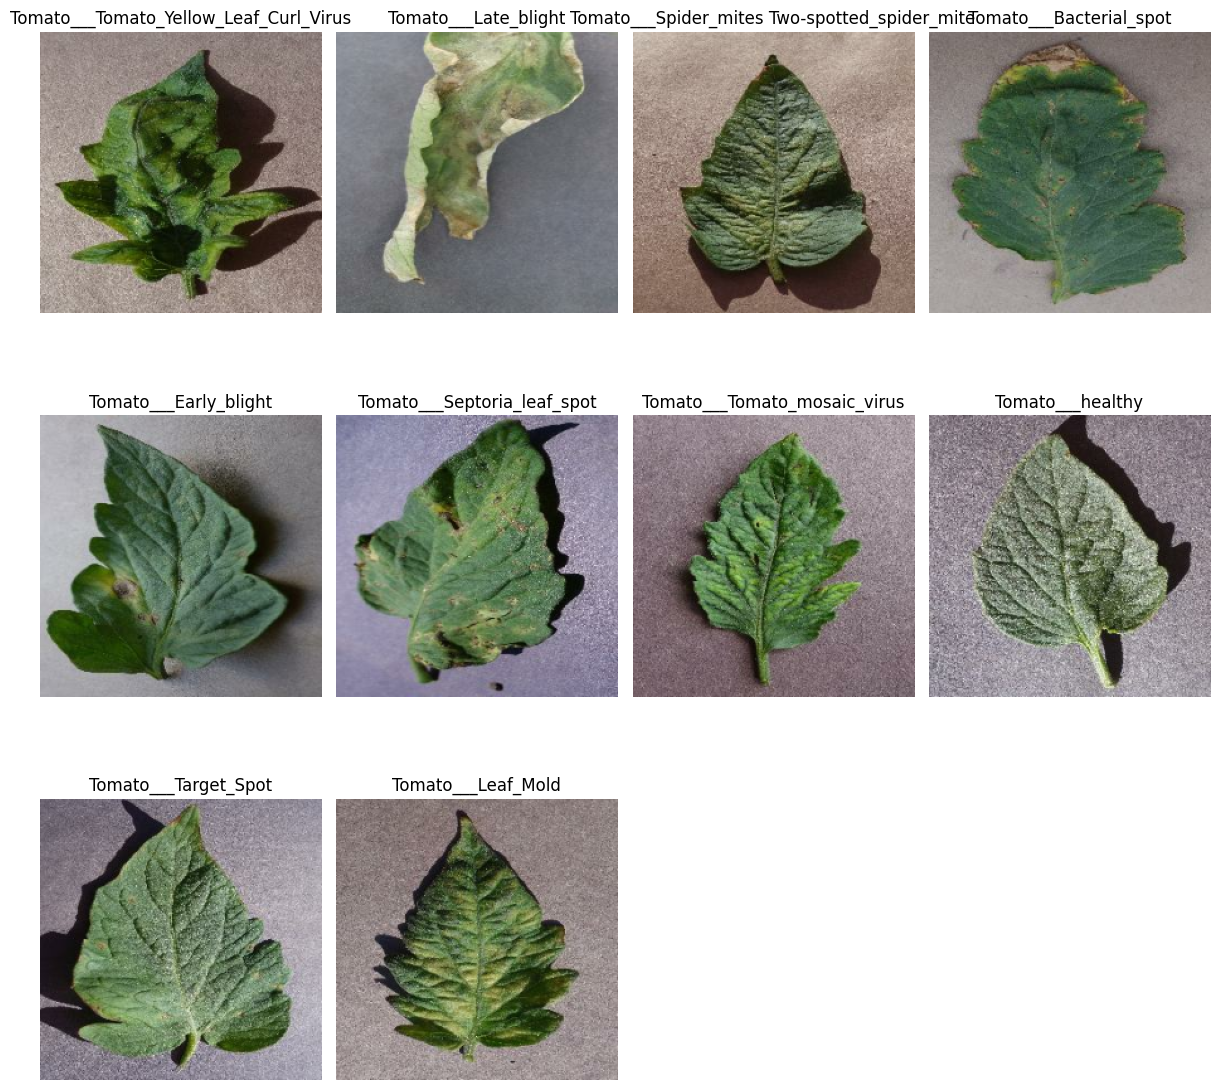

In [6]:
import matplotlib.pyplot as plt

# Unbatch the dataset to access individual images and labels
unbatched_dataset = train_dataset.unbatch()

# Create a dictionary to track one image per class
displayed_classes = set()

# Plot images
plt.figure(figsize=(12, 12))
for image, label in unbatched_dataset:
    label = label.numpy()  # Convert label to numpy
    if label not in displayed_classes:  # Check if this class has already been displayed
        plt.subplot(3, 4, len(displayed_classes) + 1)  # Adjust grid size (rows, cols)
        # Reverse normalization to display the image properly
        plt.imshow(image.numpy())  # Already scaled to [0, 1] by normalization layer
        plt.title(class_names[label])  # Use class name as title
        plt.axis("off")
        displayed_classes.add(label)
    if len(displayed_classes) == len(class_names):  # Stop if all classes are displayed
        break

plt.tight_layout()
plt.show()


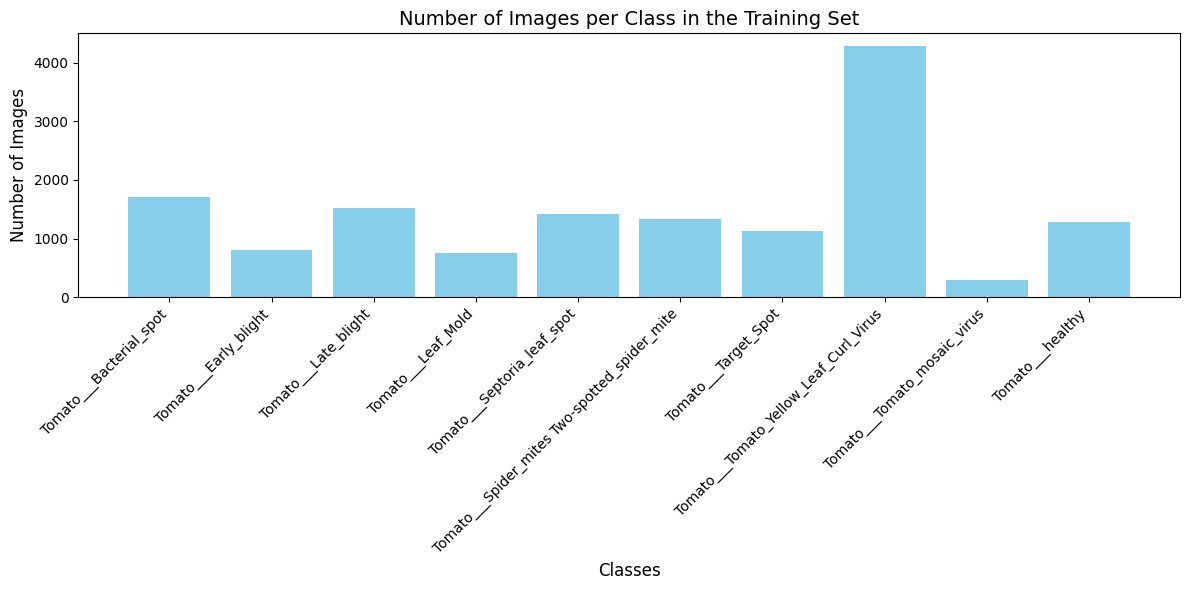

In [5]:
import os
import matplotlib.pyplot as plt

# Get class names from subdirectories
class_names = sorted(os.listdir(train_dir))

# Count images per class using the file system
class_counts = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images per Class in the Training Set', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


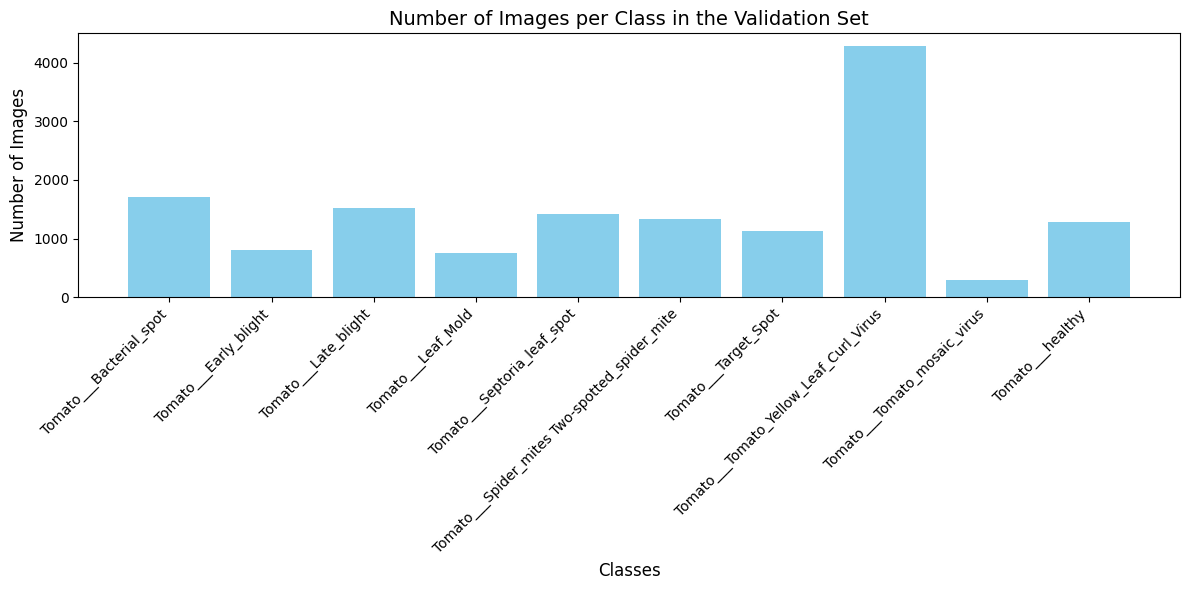

In [ ]:
import os
import matplotlib.pyplot as plt


# Get class names from subdirectories
class_names = sorted(os.listdir(train_dir))

# Count images per class using the file system
class_counts = [len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(class_names, class_counts, color='skyblue')
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Number of Images per Class in the Validation Set', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = models.Sequential([
    # First convolutional block
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional block
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),  # Smaller Dense layer
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01),  # Higher learning rate for simpler model
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │       5,972,032 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,977,770 (22.80 MB)

 Trainable params: 5,977,770 (22.80 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Training and validation datasets (from earlier steps)
BATCH_SIZE = 32
EPOCHS = 10

# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.2594 - loss: 3.4743 - val_accuracy: 0.2950 - val_loss: 2.1012
Epoch 2/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.2955 - loss: 2.1088 - val_accuracy: 0.2950 - val_loss: 2.1028
Epoch 3/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.2961 - loss: 2.1057 - val_accuracy: 0.2950 - val_loss: 2.1019
Epoch 4/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.2958 - loss: 2.1057 - val_accuracy: 0.2950 - val_loss: 2.1013
Epoch 5/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.2963 - loss: 2.1047 - val_accuracy: 0.2950 - val_loss: 2.1018
Epoch 6/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.2960 - loss: 2.1046 - val_accuracy: 0.2950 - val_loss: 2.1013
Epoch 7/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 58ms/step - accuracy: 0.2947 - loss: 2.1058 - val_accuracy: 0.2950 - val_loss: 2.1013
Epoch 8/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.2950 - loss: 2.1068 - 

In [17]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.0930 - loss: 2.2421
Validation Loss: 2.1010
Validation Accuracy: 0.2950


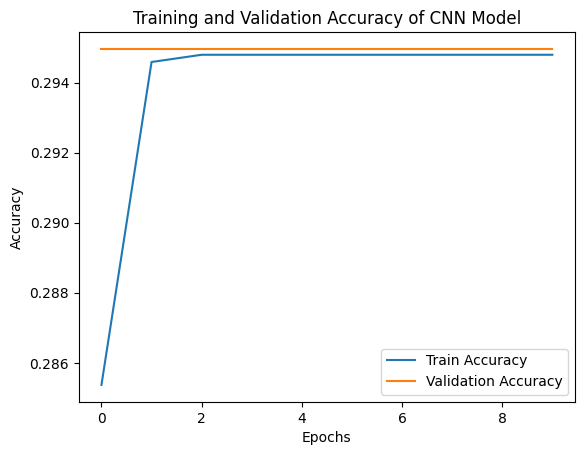

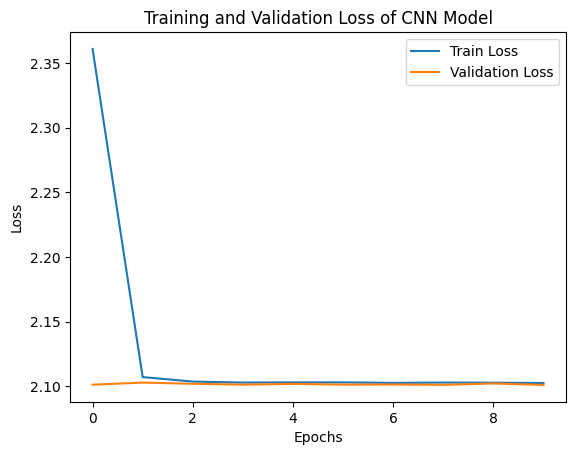

In [18]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy of CNN Model')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss of CNN Model')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

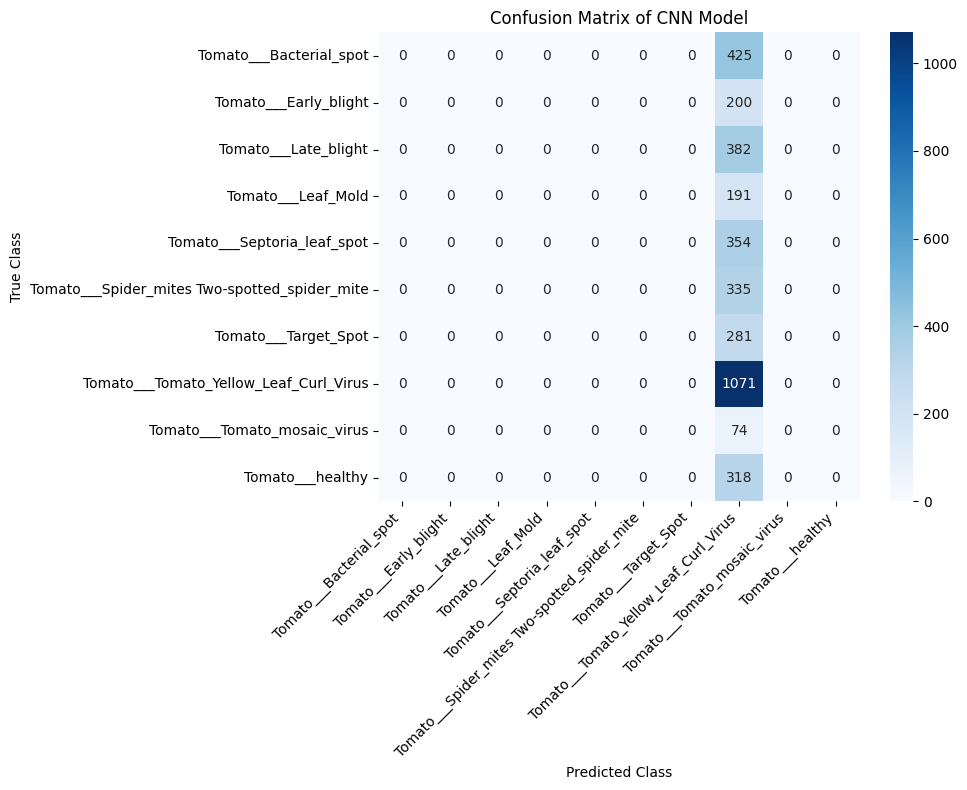

In [19]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Iterate over validation dataset
for images, labels in val_dataset:
    # Get model predictions for the batch
    predictions = model.predict(images)

    # Extend the true labels and predicted labels lists
    y_true.extend(labels.numpy())  # True labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels (get the class with highest probability)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix of CNN Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [20]:
# Generate and print the classification report of CNN Model
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report of CNN Model:")
print(class_report)

Classification Report of CNN Model:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.00      0.00      0.00       425
                        Tomato___Early_blight       0.00      0.00      0.00       200
                         Tomato___Late_blight       0.00      0.00      0.00       382
                           Tomato___Leaf_Mold       0.00      0.00      0.00       191
                  Tomato___Septoria_leaf_spot       0.00      0.00      0.00       354
Tomato___Spider_mites Two-spotted_spider_mite       0.00      0.00      0.00       335
                         Tomato___Target_Spot       0.00      0.00      0.00       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.29      1.00      0.46      1071
                 Tomato___Tomato_mosaic_virus       0.00      0.00      0.00        74
                             Tomato___healthy       0.00      0.00      0.00       318

     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


y_pred contains class indices, converting to probabilities...


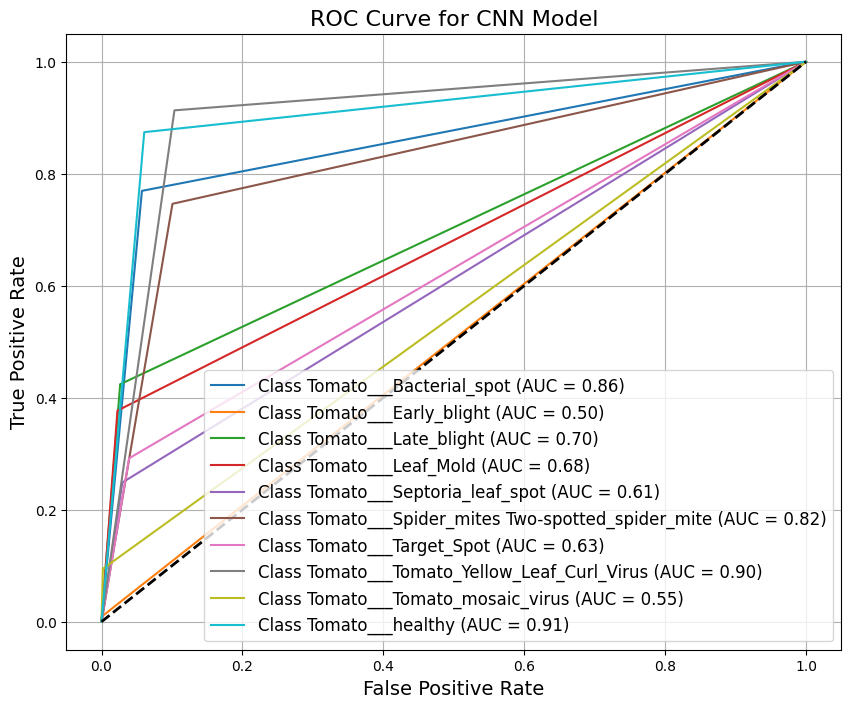

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_true is a 1D array of integers
y_true = np.array(y_true)  # Convert to numpy array if not already
if len(y_true.shape) != 1:
    y_true = np.argmax(y_true, axis=1)  # Flatten if one-hot encoded

# If y_pred is not in probability form, convert to one-hot probabilities
if len(y_pred.shape) == 1:
    print("y_pred contains class indices, converting to probabilities...")
    num_classes = len(class_names)  # Number of classes
    y_pred_probabilities = np.zeros((len(y_pred), num_classes))
    for idx, pred_class in enumerate(y_pred):
        y_pred_probabilities[idx, pred_class] = 1.0
    y_pred = y_pred_probabilities

# Verify y_pred is now 2D
if len(y_pred.shape) != 2:
    raise ValueError("y_pred must be a 2D array of predicted probabilities.")

# Binarize the true labels for multi-class ROC
num_classes = y_pred.shape[1]  # Get the number of classes
y_true_binarized = label_binarize(y_true, classes=range(num_classes))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_names[i]} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure the plot
plt.title("ROC Curve for CNN Model", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


In [21]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model = models.Sequential([
    # Convolutional layers
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Training and validation datasets (from earlier steps)
BATCH_SIZE = 32
EPOCHS = 10

# Prefetching for performance
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE
)

Epoch 1/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 34s 65ms/step - accuracy: 0.5055 - loss: 1.4958 - val_accuracy: 0.8064 - val_loss: 0.5753
Epoch 2/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.7772 - loss: 0.6741 - val_accuracy: 0.8590 - val_loss: 0.4375
Epoch 3/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.8309 - loss: 0.4907 - val_accuracy: 0.8992 - val_loss: 0.3118
Epoch 4/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.8660 - loss: 0.3976 - val_accuracy: 0.8780 - val_loss: 0.3321
Epoch 5/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.8871 - loss: 0.3342 - val_accuracy: 0.9190 - val_loss: 0.2630
Epoch 6/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.9002 - loss: 0.2950 - val_accuracy: 0.8868 - val_loss: 0.3611
Epoch 7/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 27s 59ms/step - accuracy: 0.9034 - loss: 0.2955 - val_accuracy: 0.9168 - val_loss: 0.2496
Epoch 8/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 26s 57ms/step - accuracy: 0.9283 - loss: 0.2071 - 

In [23]:
# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")


114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8856 - loss: 0.3625
Validation Loss: 0.2639
Validation Accuracy: 0.9174


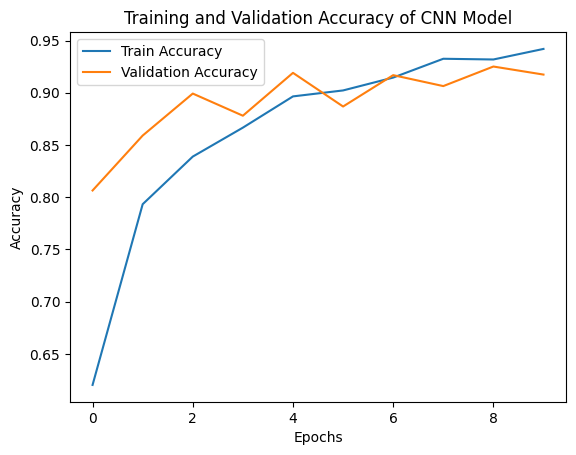

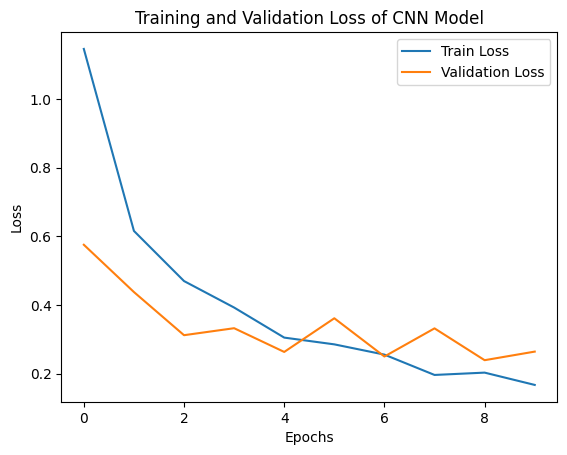

In [24]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy of CNN Model')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss of CNN Model')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 442ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━

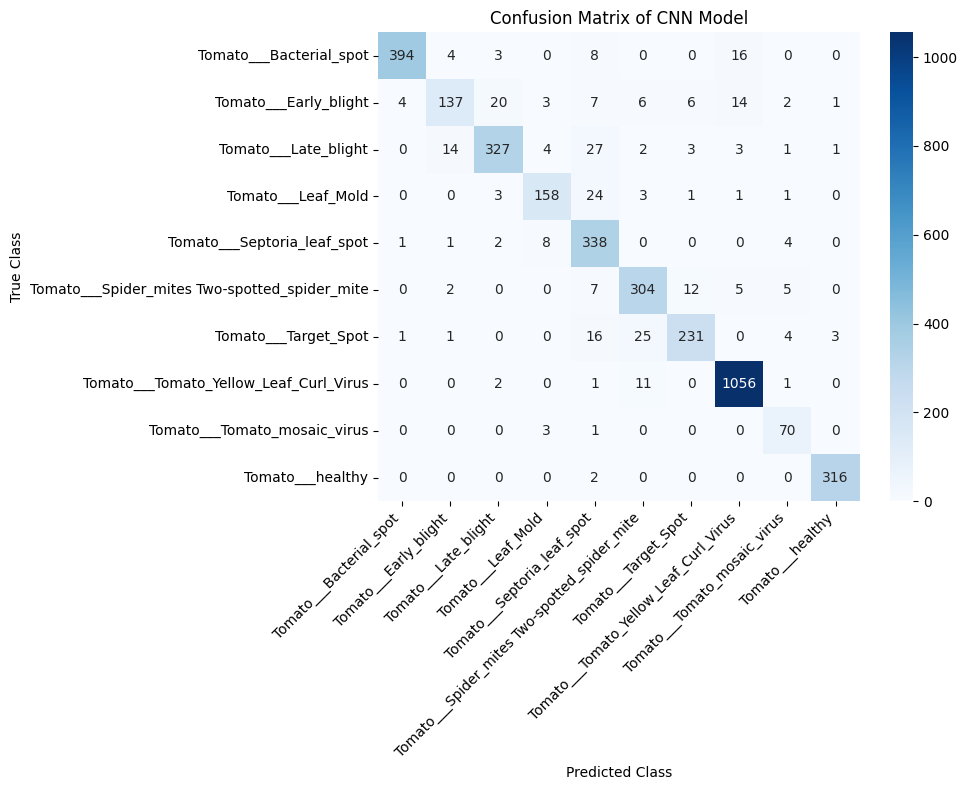

In [25]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Iterate over validation dataset
for images, labels in val_dataset:
    # Get model predictions for the batch
    predictions = model.predict(images)

    # Extend the true labels and predicted labels lists
    y_true.extend(labels.numpy())  # True labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels (get the class with highest probability)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix of CNN Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Generate and print the classification report of CNN Model
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report of CNN Model:")
print(class_report)

Classification Report of CNN Model:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.93      0.98      0.95       425
                        Tomato___Early_blight       0.81      0.74      0.77       200
                         Tomato___Late_blight       0.94      0.84      0.89       382
                           Tomato___Leaf_Mold       0.98      0.72      0.83       191
                  Tomato___Septoria_leaf_spot       0.82      0.97      0.89       354
Tomato___Spider_mites Two-spotted_spider_mite       0.92      0.91      0.92       335
                         Tomato___Target_Spot       0.85      0.92      0.89       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.99      0.98      1071
                 Tomato___Tomato_mosaic_virus       1.00      0.85      0.92        74
                             Tomato___healthy       0.98      1.00      0.99       318

     

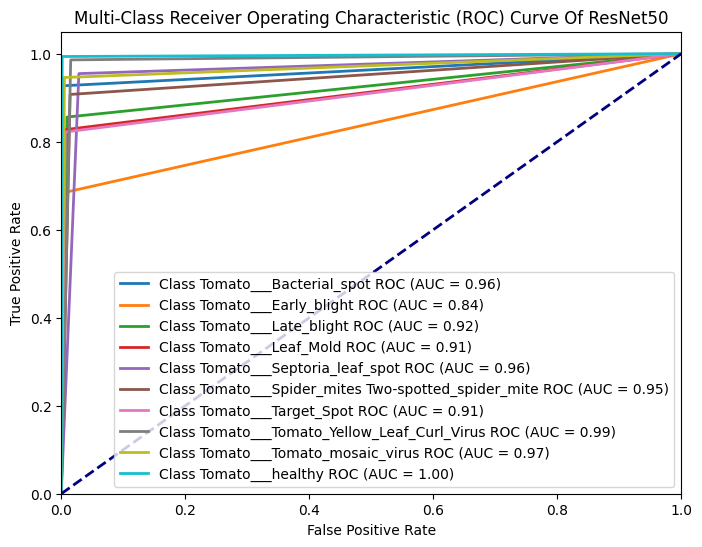

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert true labels to one-hot encoding
y_true_one_hot = label_binarize(y_true, classes=np.arange(len(class_names)))

# Convert y_pred (class predictions) to one-hot encoding if necessary
y_pred = np.array(y_pred)
if y_pred.ndim == 1:  # If y_pred contains class labels
    y_pred = label_binarize(y_pred, classes=np.arange(len(class_names)))

# Initialize dictionaries to store the FPR, TPR, and AUC for each class
fpr_all = {}
tpr_all = {}
roc_auc_all = {}

# Loop through each class
for i in range(len(class_names)):
    # Compute ROC curve and AUC for each class
    fpr_all[i], tpr_all[i], _ = roc_curve(y_true_one_hot[:, i], y_pred[:, i])
    roc_auc_all[i] = auc(fpr_all[i], tpr_all[i])

# Plot ROC curves for all classes
plt.figure(figsize=(8, 6))

for i in range(len(class_names)):
    plt.plot(
        fpr_all[i], tpr_all[i], lw=2,
        label='Class {} ROC (AUC = {:.2f})'.format(class_names[i], roc_auc_all[i])
    )

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve Of ResNet50')
plt.legend(loc="lower right")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,170,250 (42.61 MB)

 Trainable params: 11,170,250 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Custom callback for precision, recall, and F1-score
class MetricsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Initialize variables for tracking true and predicted labels
        y_true, y_pred = [], []

        # Iterate over the validation dataset
        for x_batch, y_batch in val_dataset:
            predictions = model.predict(x_batch, verbose=0)
            y_true.extend(y_batch.numpy())
            y_pred.extend(np.argmax(predictions, axis=1))

        # Calculate metrics
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')

        # Log the metrics
        logs['val_precision'] = precision
        logs['val_recall'] = recall
        logs['val_f1'] = f1

        # Print metrics for this epoch
        print(f" - val_precision: {precision:.4f} - val_recall: {recall:.4f} - val_f1: {f1:.4f}")

# Prepare datasets
BATCH_SIZE = 32
EPOCHS = 20

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# Train the model with early stopping and metrics callback
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, MetricsCallback()]
)

Epoch 1/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.4486 - loss: 1.6381 - val_precision: 0.7783 - val_recall: 0.7687 - val_f1: 0.7520
455/455 ━━━━━━━━━━━━━━━━━━━━ 39s 80ms/step - accuracy: 0.4489 - loss: 1.6373 - val_accuracy: 0.7687 - val_loss: 0.7186 - val_precision: 0.7783 - val_recall: 0.7687 - val_f1: 0.7520
Epoch 2/20
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7118 - loss: 0.8393 - val_precision: 0.8343 - val_recall: 0.8246 - val_f1: 0.8224
455/455 ━━━━━━━━━━━━━━━━━━━━ 35s 76ms/step - accuracy: 0.7118 - loss: 0.8391 - val_accuracy: 0.8246 - val_loss: 0.5026 - val_precision: 0.8343 - val_recall: 0.8246 - val_f1: 0.8224
Epoch 3/20
453/455 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.7596 - loss: 0.6855 - val_precision: 0.8746 - val_recall: 0.8752 - val_f1: 0.8719
455/455 ━━━━━━━━━━━━━━━━━━━━ 34s 76ms/step - accuracy: 0.7597 - loss: 0.6854 - val_accuracy: 0.8752 - val_loss: 0.4093 - val_precision: 0.8746 - val_recall: 0.8752 - val_f1: 0.8719
Epoch 4/20

In [ ]:
# Evaluate the model and calculate additional metrics
def evaluate_metrics(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset:
        y_true.extend(labels.numpy())
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate ROC-AUC (for binary classification or one-vs-rest approach)
    if len(class_names) == 2:  # Binary classification
        y_proba = model.predict(dataset.map(lambda x, y: x))
        roc_auc = roc_auc_score(y_true, y_proba[:, 1])  # Probability of positive class
        print(f"ROC-AUC: {roc_auc}")

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    return precision, recall, f1

# Evaluate metrics on the validation dataset
evaluate_metrics(model, val_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

(0.9254744558860578, 0.9237124759019554, 0.9229554271083843)

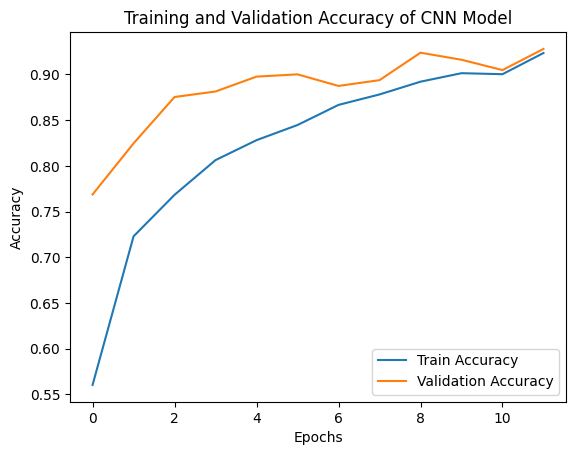

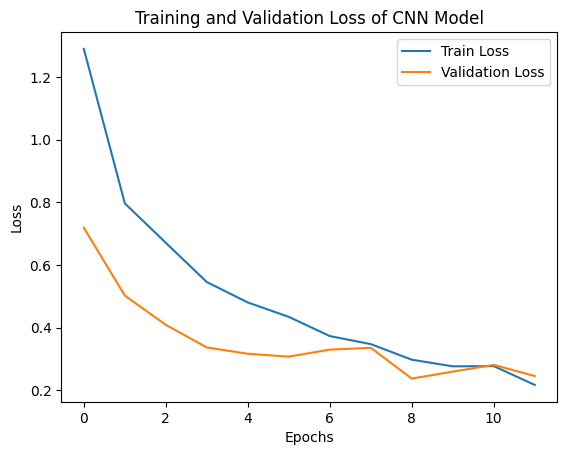

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy of CNN Model')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss of CNN Model')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

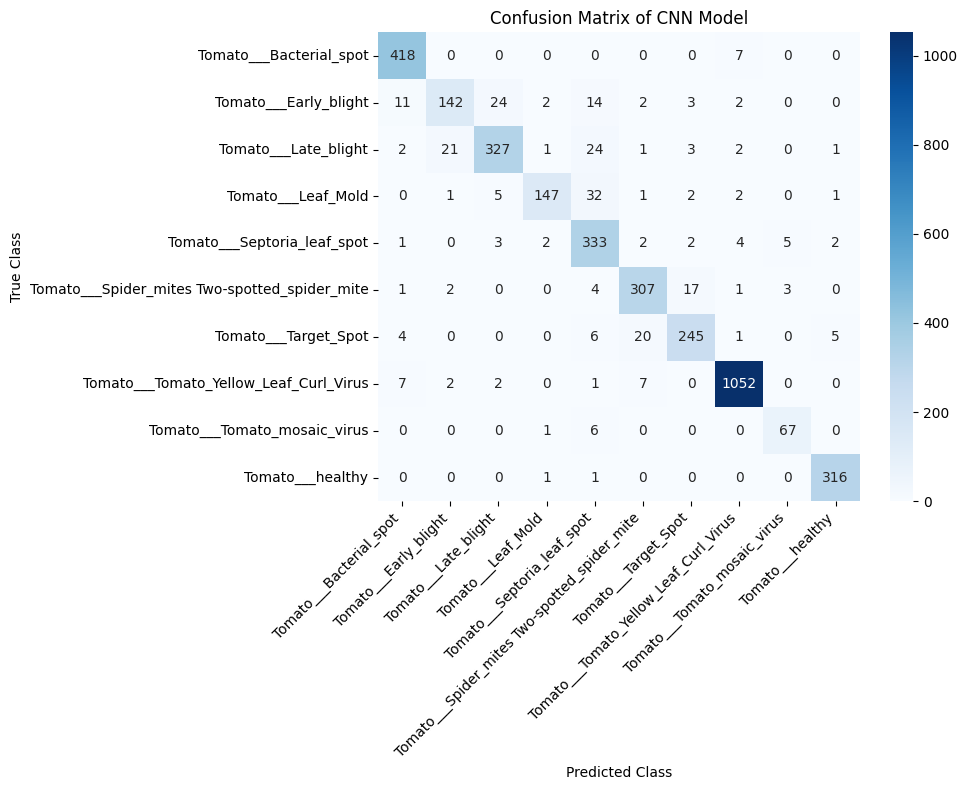

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Iterate over validation dataset
for images, labels in val_dataset:
    # Get model predictions for the batch
    predictions = model.predict(images)

    # Extend the true labels and predicted labels lists
    y_true.extend(labels.numpy())  # True labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels (get the class with highest probability)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix of CNN Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Generate and print the classification report of CNN Model
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report of CNN Model:")
print(class_report)

Classification Report of CNN Model:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.94      0.98      0.96       425
                        Tomato___Early_blight       0.85      0.71      0.77       200
                         Tomato___Late_blight       0.91      0.86      0.88       382
                           Tomato___Leaf_Mold       0.95      0.77      0.85       191
                  Tomato___Septoria_leaf_spot       0.79      0.94      0.86       354
Tomato___Spider_mites Two-spotted_spider_mite       0.90      0.92      0.91       335
                         Tomato___Target_Spot       0.90      0.87      0.89       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.98      0.98      1071
                 Tomato___Tomato_mosaic_virus       0.89      0.91      0.90        74
                             Tomato___healthy       0.97      0.99      0.98       318

     

y_pred contains class indices, converting to probabilities...


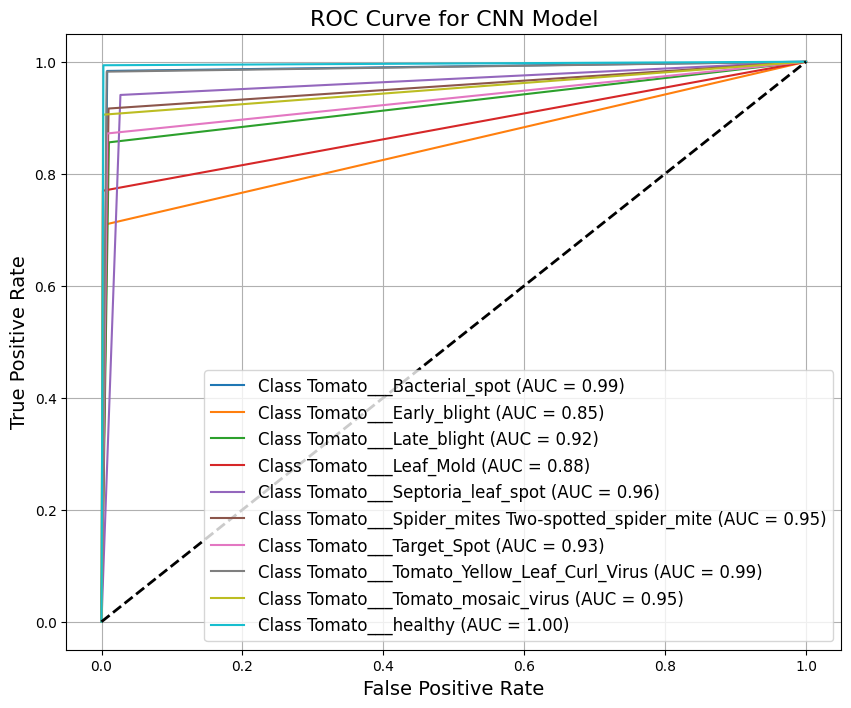

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_true is a 1D array of integers
y_true = np.array(y_true)  # Convert to numpy array if not already
if len(y_true.shape) != 1:
    y_true = np.argmax(y_true, axis=1)  # Flatten if one-hot encoded

# If y_pred is not in probability form, convert to one-hot probabilities
if len(y_pred.shape) == 1:
    print("y_pred contains class indices, converting to probabilities...")
    num_classes = len(class_names)  # Number of classes
    y_pred_probabilities = np.zeros((len(y_pred), num_classes))
    for idx, pred_class in enumerate(y_pred):
        y_pred_probabilities[idx, pred_class] = 1.0
    y_pred = y_pred_probabilities

# Verify y_pred is now 2D
if len(y_pred.shape) != 2:
    raise ValueError("y_pred must be a 2D array of predicted probabilities.")

# Binarize the true labels for multi-class ROC
num_classes = y_pred.shape[1]  # Get the number of classes
y_true_binarized = label_binarize(y_true, classes=range(num_classes))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_names[i]} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure the plot
plt.title("ROC Curve for CNN Model", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()


In [ ]:
from tensorflow.keras.initializers import HeNormal

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer=HeNormal(), input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer=HeNormal()),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer=HeNormal()),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu', kernel_initializer=HeNormal()),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


# Model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 52, 52, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,171,658 (42.62 MB)

 Trainable params: 11,170,954 (42.61 MB)

 Non-trainable params: 704 (2.75 KB)

In [ ]:
# Prepare datasets
BATCH_SIZE = 32
EPOCHS = 20

AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

# Train the model with early stopping and metrics callback
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping, MetricsCallback()]
)

Epoch 1/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6759 - loss: 1.0346 - val_precision: 0.7784 - val_recall: 0.6075 - val_f1: 0.6156
455/455 ━━━━━━━━━━━━━━━━━━━━ 43s 83ms/step - accuracy: 0.6761 - loss: 1.0339 - val_accuracy: 0.6075 - val_loss: 1.1408 - val_precision: 0.7784 - val_recall: 0.6075 - val_f1: 0.6156
Epoch 2/20
453/455 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8500 - loss: 0.4524 - val_precision: 0.9066 - val_recall: 0.9039 - val_f1: 0.9026
455/455 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.8501 - loss: 0.4520 - val_accuracy: 0.9039 - val_loss: 0.2977 - val_precision: 0.9066 - val_recall: 0.9039 - val_f1: 0.9026
Epoch 3/20
453/455 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.9064 - loss: 0.2796 - val_precision: 0.9101 - val_recall: 0.9047 - val_f1: 0.9046
455/455 ━━━━━━━━━━━━━━━━━━━━ 34s 75ms/step - accuracy: 0.9064 - loss: 0.2795 - val_accuracy: 0.9047 - val_loss: 0.2956 - val_precision: 0.9101 - val_recall: 0.9047 - val_f1: 0.9046
Epoch 4/20

In [ ]:
# Evaluate the model and calculate additional metrics
def evaluate_metrics(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset:
        y_true.extend(labels.numpy())
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate ROC-AUC (for binary classification or one-vs-rest approach)
    if len(class_names) == 2:  # Binary classification
        y_proba = model.predict(dataset.map(lambda x, y: x))
        roc_auc = roc_auc_score(y_true, y_proba[:, 1])  # Probability of positive class
        print(f"ROC-AUC: {roc_auc}")

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    return precision, recall, f1

# Evaluate metrics on the validation dataset
evaluate_metrics(model, val_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

(0.9344546612596799, 0.9300468190581107, 0.9286441543300863)

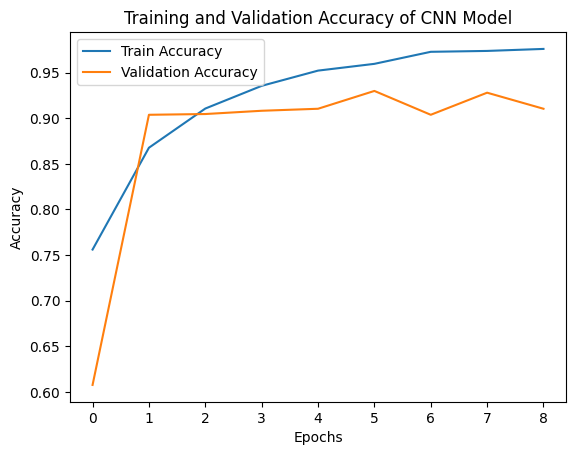

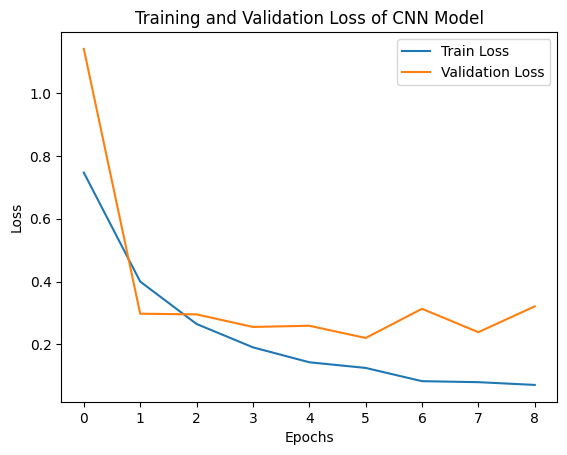

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy of CNN Model')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss of CNN Model')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━

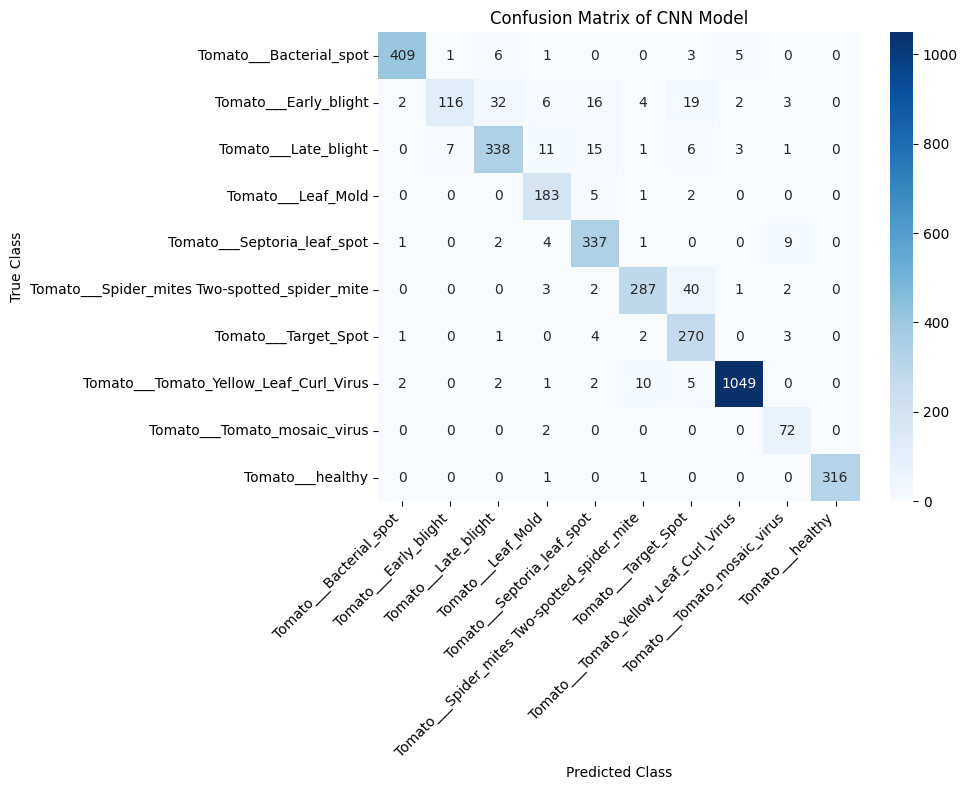

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Iterate over validation dataset
for images, labels in val_dataset:
    # Get model predictions for the batch
    predictions = model.predict(images)

    # Extend the true labels and predicted labels lists
    y_true.extend(labels.numpy())  # True labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels (get the class with highest probability)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix of CNN Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Generate and print the classification report of CNN Model
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report of CNN Model:")
print(class_report)

Classification Report of CNN Model:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.99      0.96      0.97       425
                        Tomato___Early_blight       0.94      0.58      0.72       200
                         Tomato___Late_blight       0.89      0.88      0.89       382
                           Tomato___Leaf_Mold       0.86      0.96      0.91       191
                  Tomato___Septoria_leaf_spot       0.88      0.95      0.92       354
Tomato___Spider_mites Two-spotted_spider_mite       0.93      0.86      0.89       335
                         Tomato___Target_Spot       0.78      0.96      0.86       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.98      0.98      1071
                 Tomato___Tomato_mosaic_virus       0.80      0.97      0.88        74
                             Tomato___healthy       1.00      0.99      1.00       318

     

y_pred contains class indices, converting to probabilities...


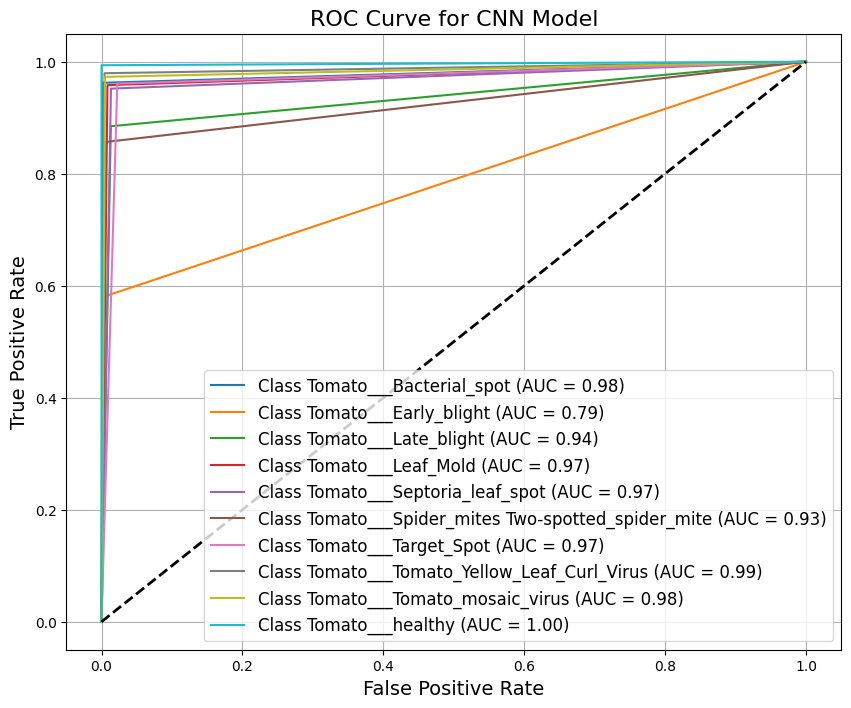

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Ensure y_true is a 1D array of integers
y_true = np.array(y_true)  # Convert to numpy array if not already
if len(y_true.shape) != 1:
    y_true = np.argmax(y_true, axis=1)  # Flatten if one-hot encoded

# If y_pred is not in probability form, convert to one-hot probabilities
if len(y_pred.shape) == 1:
    print("y_pred contains class indices, converting to probabilities...")
    num_classes = len(class_names)  # Number of classes
    y_pred_probabilities = np.zeros((len(y_pred), num_classes))
    for idx, pred_class in enumerate(y_pred):
        y_pred_probabilities[idx, pred_class] = 1.0
    y_pred = y_pred_probabilities

# Verify y_pred is now 2D
if len(y_pred.shape) != 2:
    raise ValueError("y_pred must be a 2D array of predicted probabilities.")

# Binarize the true labels for multi-class ROC
num_classes = y_pred.shape[1]  # Get the number of classes
y_true_binarized = label_binarize(y_true, classes=range(num_classes))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {class_names[i]} (AUC = {roc_auc[i]:.2f})")

# Plot diagonal
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Configure the plot
plt.title("ROC Curve for CNN Model", fontsize=16)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True)
plt.show()

#TRANSFER LEARNING RESNET50

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define the batch size
BATCH_SIZE = 32

# Load your datasets (make sure they are already loaded as train_dataset and val_dataset)
# Apply image preprocessing (preprocess_input for ResNet50)
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), y))

# Define the ResNet50 model for transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of ResNet50 (initial training)
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,859,466 (91.02 MB)

 Trainable params: 267,658 (1.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

In [ ]:
# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping]
)




Epoch 1/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 48s 84ms/step - accuracy: 0.1480 - loss: 2.2718 - val_accuracy: 0.3120 - val_loss: 2.1921
Epoch 2/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.3604 - loss: 2.0704 - val_accuracy: 0.3878 - val_loss: 1.9374
Epoch 3/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.3789 - loss: 1.9146 - val_accuracy: 0.3941 - val_loss: 1.8301
Epoch 4/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 31s 67ms/step - accuracy: 0.3891 - loss: 1.8395 - val_accuracy: 0.4062 - val_loss: 1.7636
Epoch 5/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.3974 - loss: 1.7789 - val_accuracy: 0.4208 - val_loss: 1.7097
Epoch 6/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.4176 - loss: 1.7369 - val_accuracy: 0.4379 - val_loss: 1.6654
Epoch 7/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.4240 - loss: 1.7024 - val_accuracy: 0.4528 - val_loss: 1.6276
Epoch 8/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 31s 68ms/step - accuracy: 0.4335 - loss: 1.6709 - 

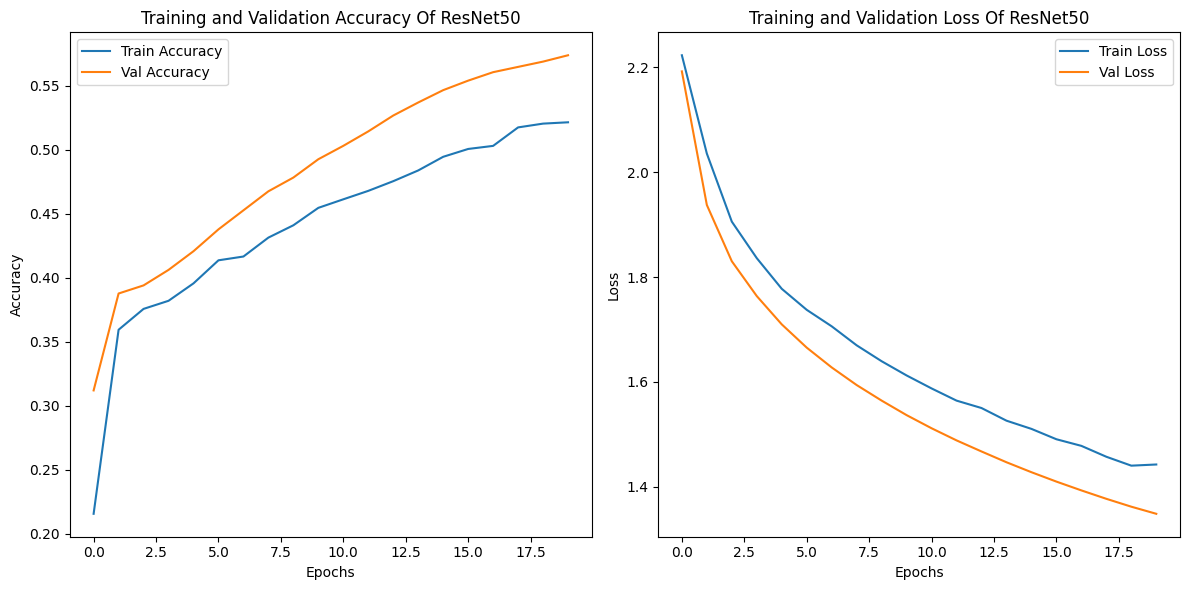

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy Of ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss Of ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.4630 - loss: 1.5341
Validation Loss: 1.3484907150268555
Validation Accuracy: 0.5739465951919556


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━

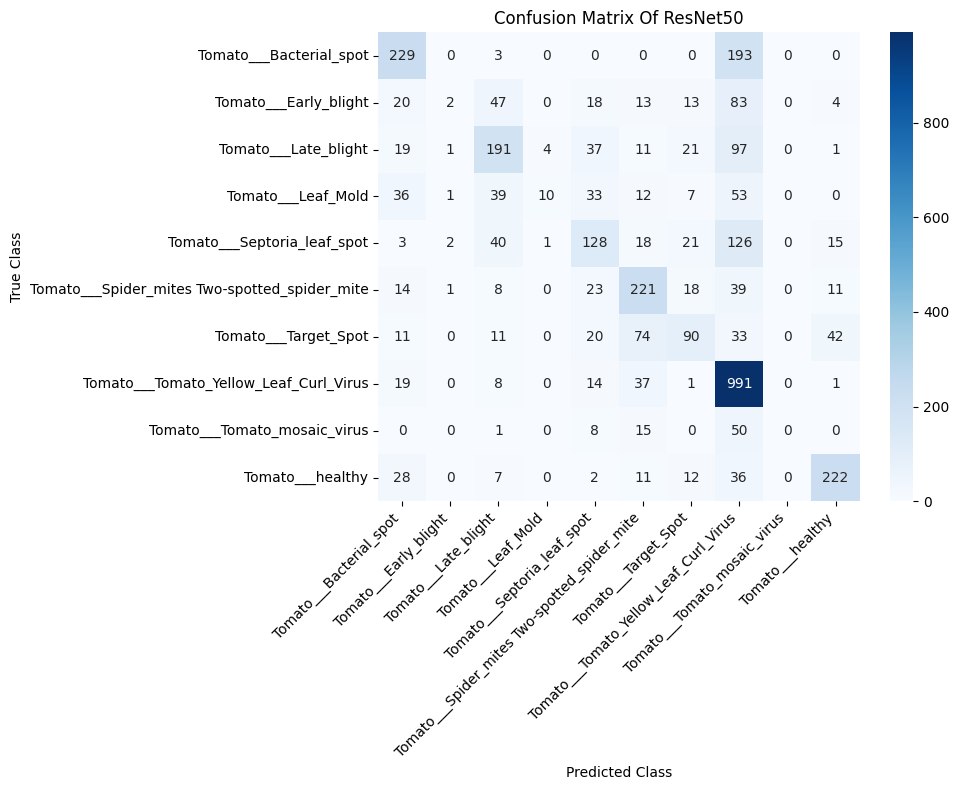

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Iterate over validation dataset
for images, labels in val_dataset:
    # Get model predictions for the batch
    predictions = model.predict(images)

    # Extend the true labels and predicted labels lists
    y_true.extend(labels.numpy())  # True labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels (get the class with highest probability)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Of ResNet50')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Generate and print the classification report
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report Of ResNet50:")
print(class_report)

Classification Report Of ResNet50:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.60      0.54      0.57       425
                        Tomato___Early_blight       0.29      0.01      0.02       200
                         Tomato___Late_blight       0.54      0.50      0.52       382
                           Tomato___Leaf_Mold       0.67      0.05      0.10       191
                  Tomato___Septoria_leaf_spot       0.45      0.36      0.40       354
Tomato___Spider_mites Two-spotted_spider_mite       0.54      0.66      0.59       335
                         Tomato___Target_Spot       0.49      0.32      0.39       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.58      0.93      0.72      1071
                 Tomato___Tomato_mosaic_virus       0.00      0.00      0.00        74
                             Tomato___healthy       0.75      0.70      0.72       318

      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# FINE TUNNING

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define the batch size
BATCH_SIZE = 32

# Load your datasets (make sure they are already loaded as train_dataset and val_dataset)
# Apply image preprocessing (preprocess_input for ResNet50)
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), y))

# Define the ResNet50 model for transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of ResNet50 (initial training)
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,859,466 (91.02 MB)

 Trainable params: 267,658 (1.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

In [ ]:
# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping]
)

# After initial training, unfreeze some top layers of ResNet50 for fine-tuning
base_model.trainable = True

# Unfreeze all layers up to the 143rd layer
for layer in base_model.layers[:143]:
    layer.trainable = False

# Re-compile the model after unfreezing some layers
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model for a few more epochs
history_finetune = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=BATCH_SIZE
)

Epoch 1/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 47s 81ms/step - accuracy: 0.1674 - loss: 2.2598 - val_accuracy: 0.2503 - val_loss: 2.2397
Epoch 2/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.3454 - loss: 2.0175 - val_accuracy: 0.3421 - val_loss: 1.8791
Epoch 3/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.3607 - loss: 1.8761 - val_accuracy: 0.3597 - val_loss: 1.7716
Epoch 4/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.3757 - loss: 1.7980 - val_accuracy: 0.3839 - val_loss: 1.7036
Epoch 5/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 73ms/step - accuracy: 0.4044 - loss: 1.7381 - val_accuracy: 0.4153 - val_loss: 1.6482
Epoch 6/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.4289 - loss: 1.6869 - val_accuracy: 0.4445 - val_loss: 1.6014
Epoch 7/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.4460 - loss: 1.6492 - val_accuracy: 0.4712 - val_loss: 1.5603
Epoch 8/30
455/455 ━━━━━━━━━━━━━━━━━━━━ 33s 72ms/step - accuracy: 0.4548 - loss: 1.6163 - 

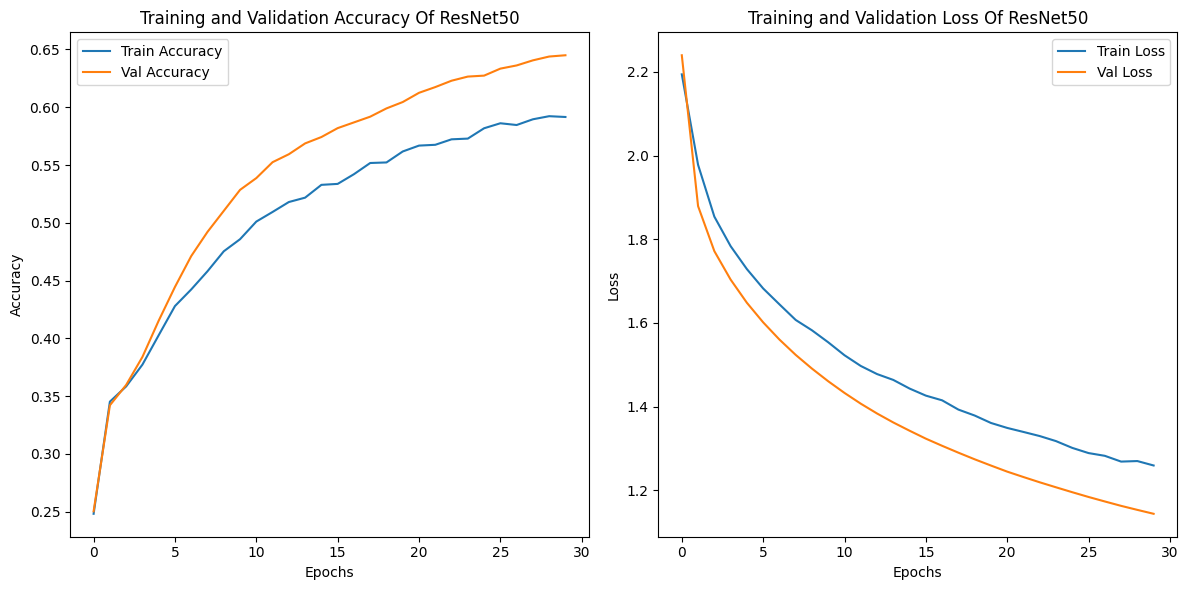

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy Of ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss Of ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

114/114 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - accuracy: 0.0961 - loss: 17.6707
Validation Loss: 12.755670547485352
Validation Accuracy: 0.10933627188205719


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━

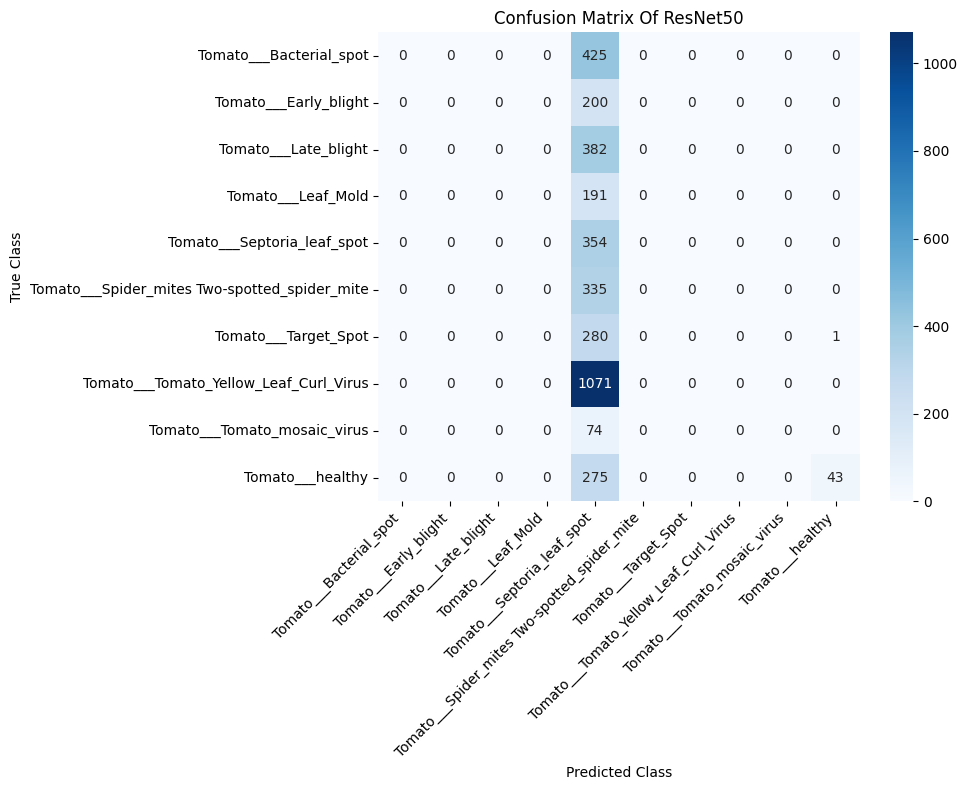

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Iterate over validation dataset
for images, labels in val_dataset:
    # Get model predictions for the batch
    predictions = model.predict(images)

    # Extend the true labels and predicted labels lists
    y_true.extend(labels.numpy())  # True labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels (get the class with highest probability)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Of ResNet50')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet50 import preprocess_input

# Define the batch size
BATCH_SIZE = 32

# Load your datasets (make sure they are already loaded as train_dataset and val_dataset)
# Apply image preprocessing (preprocess_input for ResNet50)
train_dataset = train_dataset.map(lambda x, y: (preprocess_input(x), y))
val_dataset = val_dataset.map(lambda x, y: (preprocess_input(x), y))

# Define the ResNet50 model for transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of ResNet50 (initial training)
base_model.trainable = False

# Build the model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization
    layers.Dense(len(class_names), activation='softmax')
])

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,859,466 (91.02 MB)

 Trainable params: 267,658 (1.02 MB)

 Non-trainable params: 23,591,808 (90.00 MB)

In [28]:
# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=BATCH_SIZE,
    callbacks=[early_stopping]
)

# After initial training, unfreeze some top layers of ResNet50 for fine-tuning
base_model.trainable = True

# Unfreeze all layers up to the 143rd layer (you can experiment with this number)
for layer in base_model.layers[:143]:
    layer.trainable = False

# Re-compile the model after unfreezing some layers
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model for a few more epochs
history_finetune = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    batch_size=BATCH_SIZE
)

Epoch 1/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 47s 79ms/step - accuracy: 0.2119 - loss: 2.2726 - val_accuracy: 0.3423 - val_loss: 2.1072
Epoch 2/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.3313 - loss: 2.0183 - val_accuracy: 0.3858 - val_loss: 1.8480
Epoch 3/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 29s 63ms/step - accuracy: 0.3728 - loss: 1.8890 - val_accuracy: 0.4200 - val_loss: 1.7398
Epoch 4/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4067 - loss: 1.7931 - val_accuracy: 0.4506 - val_loss: 1.6672
Epoch 5/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4169 - loss: 1.7418 - val_accuracy: 0.4726 - val_loss: 1.6128
Epoch 6/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4405 - loss: 1.6930 - val_accuracy: 0.4902 - val_loss: 1.5689
Epoch 7/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4506 - loss: 1.6532 - val_accuracy: 0.5001 - val_loss: 1.5322
Epoch 8/10
455/455 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.4628 - loss: 1.6121 - 

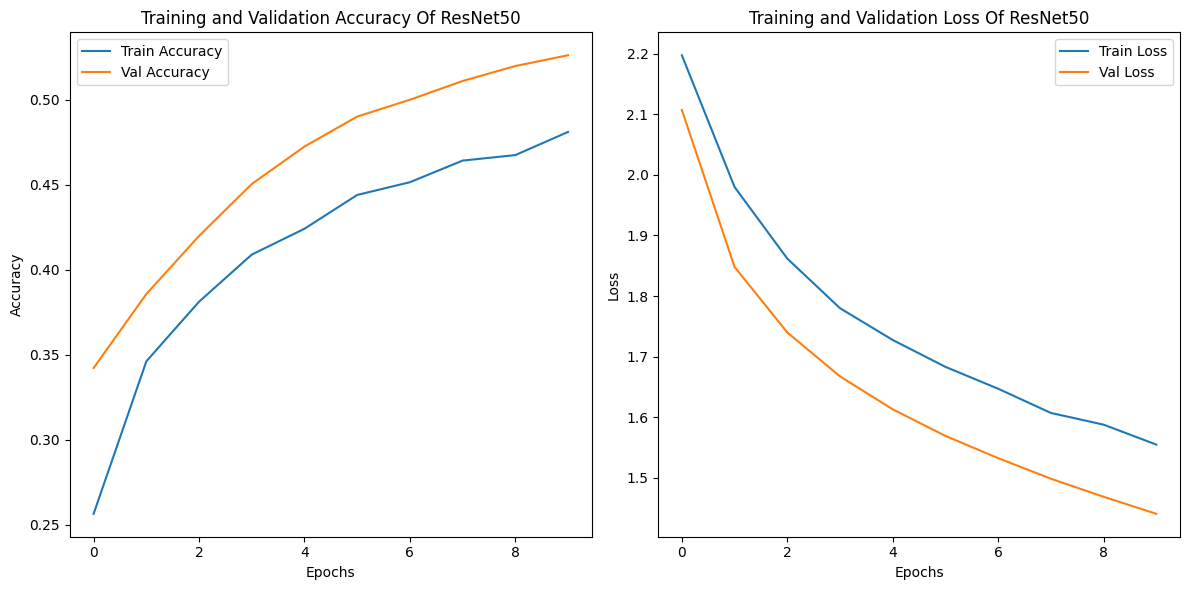

In [29]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy Of ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss Of ResNet50')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [30]:
# evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

114/114 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.7326 - loss: 0.8573
Validation Loss: 1.0848883390426636
Validation Accuracy: 0.6667584776878357


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━

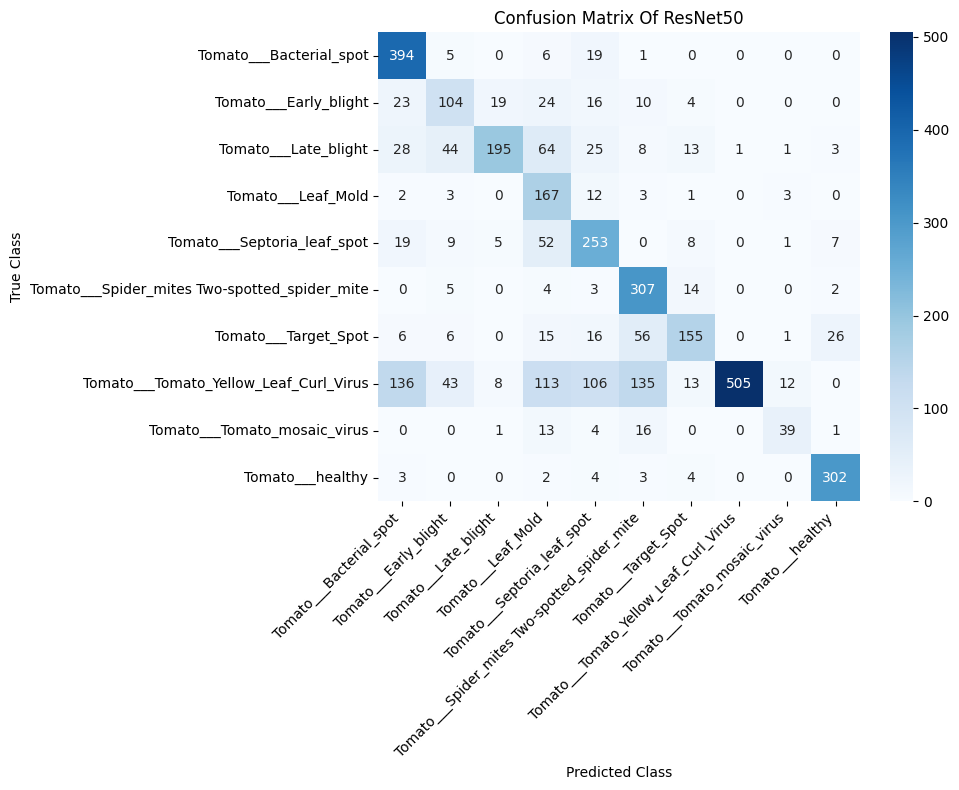

In [31]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Iterate over validation dataset
for images, labels in val_dataset:
    # Get model predictions for the batch
    predictions = model.predict(images)

    # Extend the true labels and predicted labels lists
    y_true.extend(labels.numpy())  # True labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels (get the class with highest probability)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Of ResNet50')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# Generate and print the classification report
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report Of ResNet50:")
print(class_report)

Classification Report Of ResNet50:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.64      0.93      0.76       425
                        Tomato___Early_blight       0.47      0.52      0.50       200
                         Tomato___Late_blight       0.86      0.51      0.64       382
                           Tomato___Leaf_Mold       0.36      0.87      0.51       191
                  Tomato___Septoria_leaf_spot       0.55      0.71      0.62       354
Tomato___Spider_mites Two-spotted_spider_mite       0.57      0.92      0.70       335
                         Tomato___Target_Spot       0.73      0.55      0.63       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       1.00      0.47      0.64      1071
                 Tomato___Tomato_mosaic_virus       0.68      0.53      0.60        74
                             Tomato___healthy       0.89      0.95      0.92       318

      

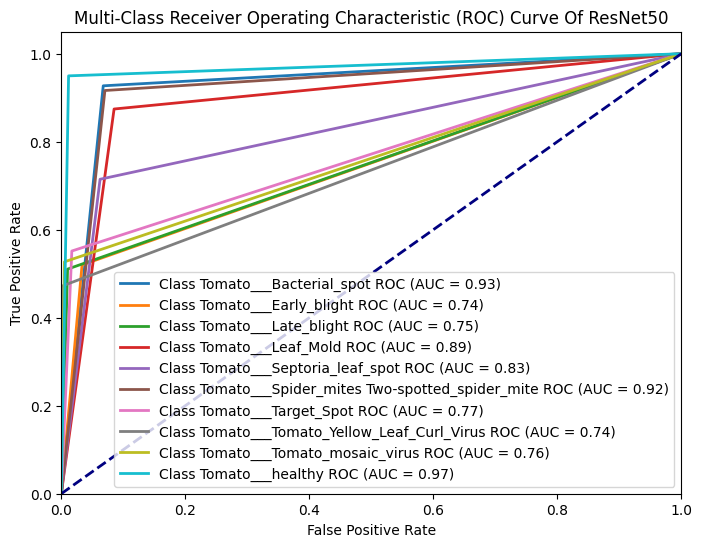

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert true labels to one-hot encoding
y_true_one_hot = label_binarize(y_true, classes=np.arange(len(class_names)))

# Convert y_pred (class predictions) to one-hot encoding if necessary
y_pred = np.array(y_pred)
if y_pred.ndim == 1:  # If y_pred contains class labels
    y_pred = label_binarize(y_pred, classes=np.arange(len(class_names)))

# Initialize dictionaries to store the FPR, TPR, and AUC for each class
fpr_all = {}
tpr_all = {}
roc_auc_all = {}

# Loop through each class
for i in range(len(class_names)):
    # Compute ROC curve and AUC for each class
    fpr_all[i], tpr_all[i], _ = roc_curve(y_true_one_hot[:, i], y_pred[:, i])
    roc_auc_all[i] = auc(fpr_all[i], tpr_all[i])

# Plot ROC curves for all classes
plt.figure(figsize=(8, 6))

for i in range(len(class_names)):
    plt.plot(
        fpr_all[i], tpr_all[i], lw=2,
        label='Class {} ROC (AUC = {:.2f})'.format(class_names[i], roc_auc_all[i])
    )

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve Of ResNet50')
plt.legend(loc="lower right")
plt.show()


# TRANSFER LEARNING WITH MOBILE NET

In [7]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

# Load the pre-trained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom layers for transfer learning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(len(class_names), activation='softmax')(x)

# Define the complete model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 112, 112, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 112, 112, 32)   │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 112, 112, 32)   │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 112, 112, 32)   │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 112, 112, 32)   │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 112, 112, 16)   │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 112, 112, 16)   │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 112, 112, 96)   │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 112, 112, 96)   │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 112, 112, 96)   │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 113, 113, 96)   │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 56, 56, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├──────────────────────

 Total params: 2,423,242 (9.24 MB)

 Trainable params: 165,258 (645.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [8]:
# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Custom callback for precision, recall, and F1-score
class MetricsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        y_true, y_pred = [], []
        for x_batch, y_batch in val_dataset:
            predictions = model.predict(x_batch, verbose=0)
            y_true.extend(y_batch.numpy())
            y_pred.extend(np.argmax(predictions, axis=1))

        y_true = np.array(y_true)
        y_pred = np.array(y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')

        # Print metrics for this epoch
        print(f"Epoch {epoch + 1}:")
        print(f" - val_precision: {precision:.4f}")
        print(f" - val_recall: {recall:.4f}")
        print(f" - val_f1: {f1:.4f}")

# Initialize the callback
metrics_callback = MetricsCallback()

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=20,  # You can increase this
    batch_size=32,
    callbacks=[early_stopping, metrics_callback]
)

Epoch 1/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.6276 - loss: 1.1345Epoch 1:
 - val_precision: 0.8783
 - val_recall: 0.8736
 - val_f1: 0.8725
455/455 ━━━━━━━━━━━━━━━━━━━━ 367s 779ms/step - accuracy: 0.6278 - loss: 1.1339 - val_accuracy: 0.8736 - val_loss: 0.3989
Epoch 2/20
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8211 - loss: 0.5229Epoch 2:
 - val_precision: 0.8995
 - val_recall: 0.8978
 - val_f1: 0.8938
455/455 ━━━━━━━━━━━━━━━━━━━━ 36s 78ms/step - accuracy: 0.8211 - loss: 0.5229 - val_accuracy: 0.8978 - val_loss: 0.3281
Epoch 3/20
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8570 - loss: 0.4229Epoch 3:
 - val_precision: 0.9081
 - val_recall: 0.9072
 - val_f1: 0.9059
455/455 ━━━━━━━━━━━━━━━━━━━━ 35s 77ms/step - accuracy: 0.8570 - loss: 0.4228 - val_accuracy: 0.9072 - val_loss: 0.2864
Epoch 4/20
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.8740 - loss: 0.3780Epoch 4:
 - val_precision: 0.9169
 - val_recall: 0.9160
 - val_f1: 0.9147


In [9]:
# Evaluate the model and calculate additional metrics
def evaluate_metrics(model, dataset):
    y_true = []
    y_pred = []
    for images, labels in dataset:
        y_true.extend(labels.numpy())
        predictions = model.predict(images)
        y_pred.extend(np.argmax(predictions, axis=1))

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    # Calculate ROC-AUC (for binary classification or one-vs-rest approach)
    if len(class_names) == 2:  # Binary classification
        y_proba = model.predict(dataset.map(lambda x, y: x))
        roc_auc = roc_auc_score(y_true, y_proba[:, 1])  # Probability of positive class
        print(f"ROC-AUC: {roc_auc}")

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    return precision, recall, f1

# Evaluate metrics on the validation dataset
evaluate_metrics(model, val_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

(0.9372963838392078, 0.9374827871109888, 0.9372014548596322)

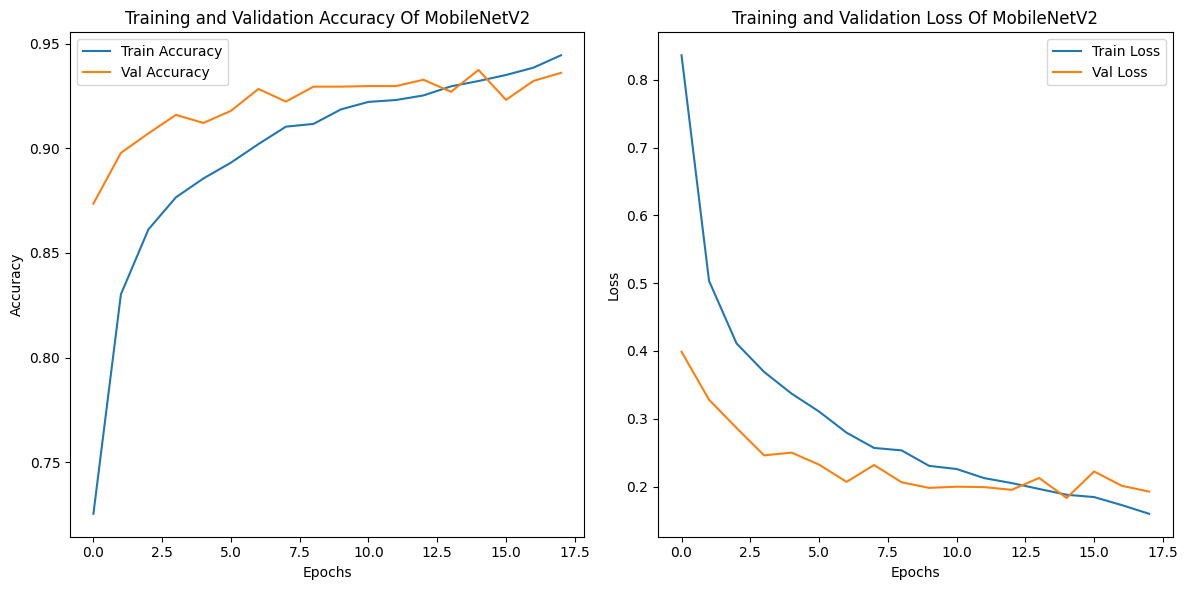

In [10]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training and Validation Accuracy Of MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training and Validation Loss Of MobileNetV2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
# evaluate the model on the validation dataset
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")

114/114 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9250 - loss: 0.2286
Validation Loss: 0.183311328291893
Validation Accuracy: 0.9374827742576599


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━

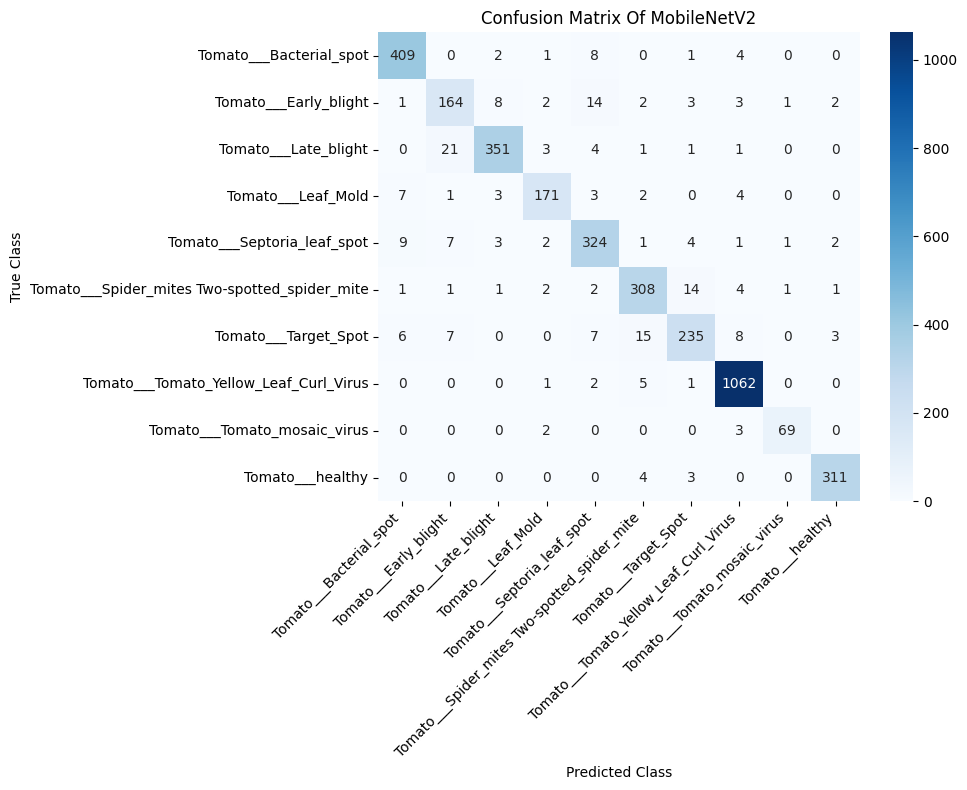

In [12]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize lists to store true labels and predicted labels
y_true = []
y_pred = []

# Iterate over validation dataset
for images, labels in val_dataset:
    # Get model predictions for the batch
    predictions = model.predict(images)

    # Extend the true labels and predicted labels lists
    y_true.extend(labels.numpy())  # True labels
    y_pred.extend(np.argmax(predictions, axis=1))  # Predicted labels (get the class with highest probability)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix Of MobileNetV2')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [13]:
# Generate and print the classification report
class_report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report Of MobileNetV2:")
print(class_report)

Classification Report Of MobileNetV2:
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.94      0.96      0.95       425
                        Tomato___Early_blight       0.82      0.82      0.82       200
                         Tomato___Late_blight       0.95      0.92      0.94       382
                           Tomato___Leaf_Mold       0.93      0.90      0.91       191
                  Tomato___Septoria_leaf_spot       0.89      0.92      0.90       354
Tomato___Spider_mites Two-spotted_spider_mite       0.91      0.92      0.92       335
                         Tomato___Target_Spot       0.90      0.84      0.87       281
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.97      0.99      0.98      1071
                 Tomato___Tomato_mosaic_virus       0.96      0.93      0.95        74
                             Tomato___healthy       0.97      0.98      0.98       318

   

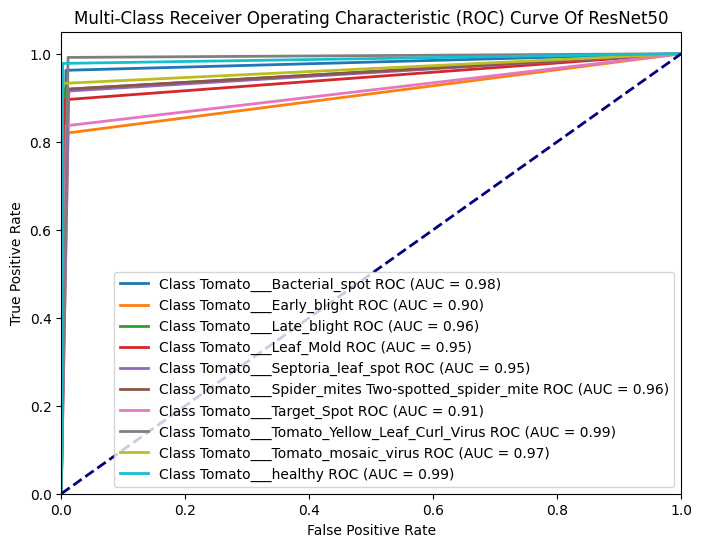

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert true labels to one-hot encoding
y_true_one_hot = label_binarize(y_true, classes=np.arange(len(class_names)))

# Convert y_pred (class predictions) to one-hot encoding if necessary
y_pred = np.array(y_pred)
if y_pred.ndim == 1:  # If y_pred contains class labels
    y_pred = label_binarize(y_pred, classes=np.arange(len(class_names)))

# Initialize dictionaries to store the FPR, TPR, and AUC for each class
fpr_all = {}
tpr_all = {}
roc_auc_all = {}

# Loop through each class
for i in range(len(class_names)):
    # Compute ROC curve and AUC for each class
    fpr_all[i], tpr_all[i], _ = roc_curve(y_true_one_hot[:, i], y_pred[:, i])
    roc_auc_all[i] = auc(fpr_all[i], tpr_all[i])

# Plot ROC curves for all classes
plt.figure(figsize=(8, 6))

for i in range(len(class_names)):
    plt.plot(
        fpr_all[i], tpr_all[i], lw=2,
        label='Class {} ROC (AUC = {:.2f})'.format(class_names[i], roc_auc_all[i])
    )

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic (ROC) Curve Of ResNet50')
plt.legend(loc="lower right")
plt.show()